In [1]:
import scanpy as sc 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/ihome/djishnu/alw399/.local/lib/python3.9/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
import sys 
sys.path.append('../../src')

from spaceoracle.oracles import BaseTravLR
from spaceoracle.plotting.cartography import Cartography
from spaceoracle.models.parallel_estimators import create_spatial_features


2025-08-08 13:05:02.582019: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1.5.5/lib:/ihome/crc/install/gcc-12.2.0/unixodbc/2.3.11/lib:/ihome/crc/install/sodium/1.0.18/lib:/ihome/crc/install/gcc-12.2.0/r/4.4.0/lib64/R/lib:/ihome/crc/install/gcc-12.2.0/openmpi/4.1.5/lib:/ihome/crc/install/gcc-12.2.0/fftw/3.3.10/lib:/ihome/crc/install/gcc-12.2.0/glpk/5.0/lib:/ihome/crc/install/gcc-12.2.0/proj/4.9.3/lib:/ihome/crc/install/gcc-12.2.0/gdal/2.4.4/lib:/ihome/crc/install/gcc-12.2.0/netcdf/4.8.1/lib:/ihome/crc/install/gcc-12.2.0/hdf5/1.14.0/lib:/ihome/crc/install/gcc-12.2.0/jags/4.3.2/lib:/ihome/crc/install/gcc-12.2.0/gsl/2.7.1/lib:/ihome/c

In [3]:
adata_control = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1_visiumHD.h5ad')
adata_ko = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymphKO4_visiumHD.h5ad')
adata_ko2 = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymphKO2_visiumHD.h5ad')

# adata_control, adata_ko

In [4]:
# adata_slideseq = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/slideseq_mouse_lymphnode.h5ad')
# adata_slideseq

### Look at data

In [1]:
import squidpy as sq
import scanpy as sc

/ihome/djishnu/alw399/.local/lib/python3.9/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/ix3/djishnu/alw399/envs/sheep/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


  0%|          | 0/990 [00:00<?, ?/s]

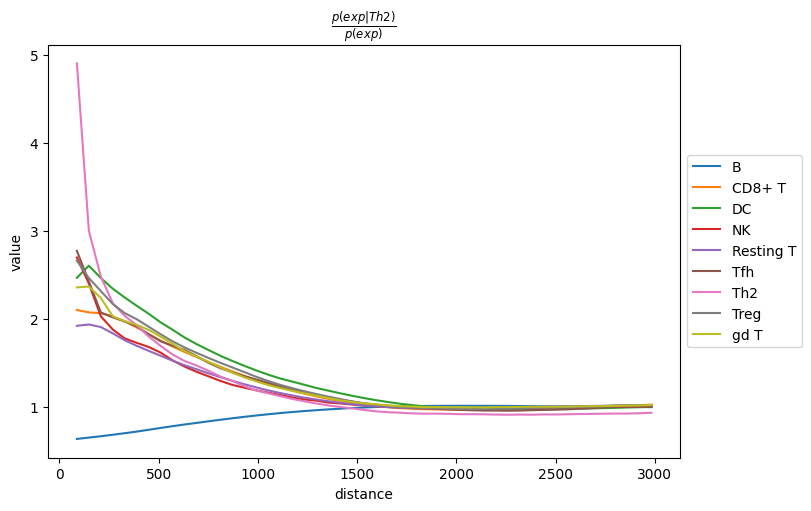

In [145]:
sq.gr.co_occurrence(adata_control, cluster_key="cell_type")
sq.pl.co_occurrence(adata_control, cluster_key="cell_type", clusters="Th2", figsize=(8, 5))

  0%|          | 0/1081 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


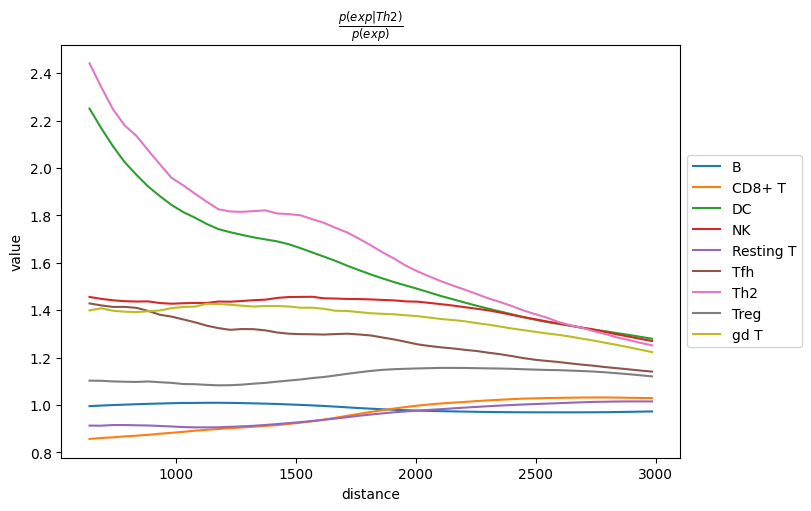

In [3]:
sq.gr.co_occurrence(adata_ko, cluster_key="cell_type")
sq.pl.co_occurrence(adata_ko, cluster_key="cell_type", clusters="Th2", figsize=(8, 5))

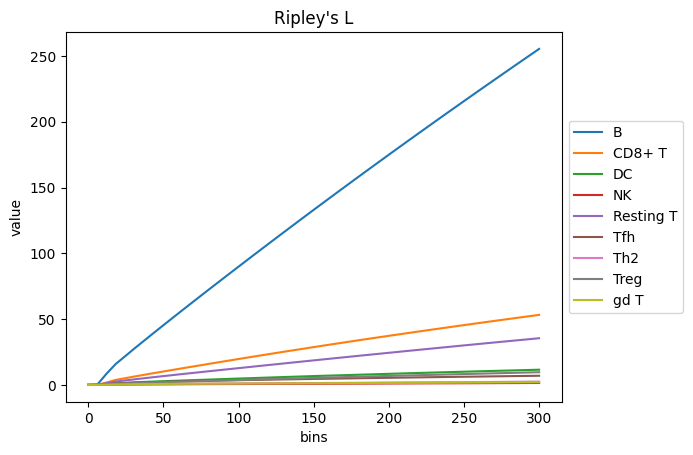

In [ ]:
mode = "L"
sq.gr.ripley(adata_control, cluster_key="cell_type", mode=mode, max_dist=300)
sq.pl.ripley(adata_control, cluster_key="cell_type", mode=mode)


In [4]:
sys.getsizeof(adata_control)

20183415120

In [5]:
sys.getsizeof(adata_ko)

20047138957

In [7]:
sys.getsizeof(adata_slideseq)

1348830779

In [ ]:
# sc.pp.neighbors(adata_control, use_rep='X_pca')
# sc.tl.umap(adata_control)

# sc.pl.umap(adata_control, color='cell_type')
# sc.pl.umap(adata_ko, color='cell_type')

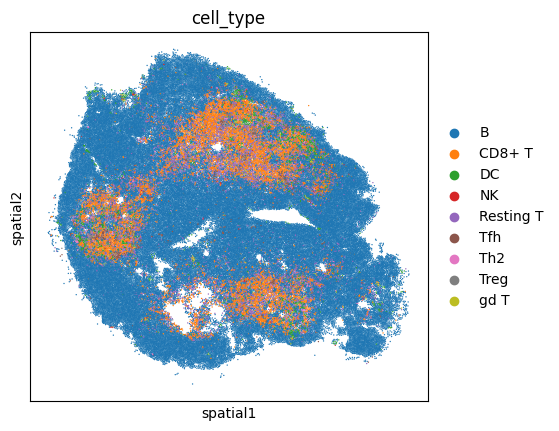

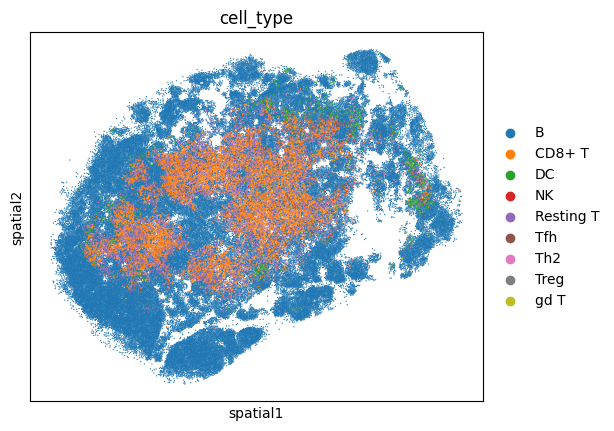

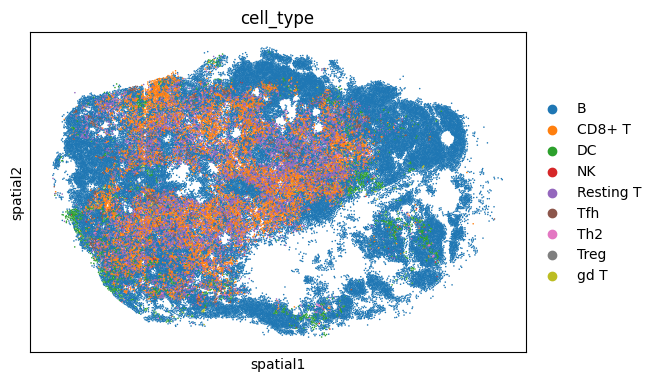

In [5]:
sc.pl.spatial(adata_control, color='cell_type', spot_size=20)
sc.pl.spatial(adata_ko, color='cell_type', spot_size=20)
sc.pl.spatial(adata_ko2, color='cell_type', spot_size=20)


In [19]:
adata_control.obs.cell_type.value_counts()

cell_type
B            67597
CD8+ T        9148
Resting T     6991
DC            1807
Treg          1607
Tfh           1060
Th2            433
gd T           362
NK             291
Name: count, dtype: int64

In [20]:
adata_ko.obs.cell_type.value_counts()


cell_type
B            65124
CD8+ T       12878
Resting T     9729
DC            1811
Treg          1586
Tfh            747
gd T           416
NK             346
Th2            332
Name: count, dtype: int64

In [6]:
adata_ko2.obs.cell_type.value_counts()


cell_type
B            43117
CD8+ T        9285
Resting T     9162
DC            1720
Tfh           1120
Treg          1098
Th2            364
gd T           271
NK             182
Name: count, dtype: int64

In [57]:
adata_slideseq.obs.cell_type.value_counts()

cell_type
B            11832
Resting T     3660
Tfh           2095
CD8+ T        2015
Treg          1771
Th2            632
DC             222
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get cell type counts and convert to proportions
slideseq_counts = adata_slideseq.obs.cell_type.value_counts()
ko_counts = adata_ko.obs.cell_type.value_counts()
control_counts = adata_control.obs.cell_type.value_counts()
ko2_counts = adata_ko2.obs.cell_type.value_counts()

# # remove B cell counts
# ko_counts = ko_counts.drop('B')
# ko2_counts = ko2_counts.drop('B')
# control_counts = control_counts.drop('B')
# slideseq_counts = slideseq_counts.drop('B')

slideseq_props = slideseq_counts / slideseq_counts.sum()
ko_props = ko_counts / ko_counts.sum()
control_props = control_counts / control_counts.sum()
ko2_props = ko2_counts / ko2_counts.sum()

# Get unique cell types for consistent coloring (union of all cell types)
all_cell_types = sorted(
    set(slideseq_props.index)
    | set(ko_props.index)
    | set(control_props.index)
    | set(ko2_props.index)
)
colors = plt.cm.Set3(np.linspace(0, 1, len(all_cell_types)))
color_map = dict(zip(all_cell_types, colors))

# Helper to get colors and labels in the right order for each pie
def get_pie_args(props):
    # Only include cell types present in this condition
    labels = []
    values = []
    pie_colors = []
    for ct in all_cell_types:
        if ct in props.index:
            labels.append(ct)
            values.append(props[ct])
            pie_colors.append(color_map[ct])
    return values, labels, pie_colors

In [32]:
def plot_celltype_pie(props, title, filename):
    values, labels, pie_colors = get_pie_args(props)
    fig, ax = plt.subplots(figsize=(10,10), dpi=300)
    wedges, texts, autotexts = ax.pie(
        values, 
        colors=pie_colors, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        pctdistance=0.8  # Move percentage labels outward for better visibility
    )

    for i, autotext in enumerate(autotexts):
        if autotext.get_text() != '':
            # Get the angle of the wedge's center
            ang = (wedges[i].theta2 + wedges[i].theta1) / 2.
            x = np.cos(np.deg2rad(ang))
            y = np.sin(np.deg2rad(ang))
            # Jitter: move label slightly outward and a bit tangentially
            # jitter = 0.05
            jitter = 0.0
            autotext.set_position((1.05 * x + jitter * (-y), 1.05 * y + jitter * x))
            autotext.set_fontsize(5)
            autotext.set_weight('bold')

    ax.legend(
        labels,
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=10,
        frameon=False,
        title='Cell Type'
    )

    ax.set_title(title, fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"{filename}.svg")

    return fig, ax
    

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: title={'center': 'Control Cell Type Proportions'}>)

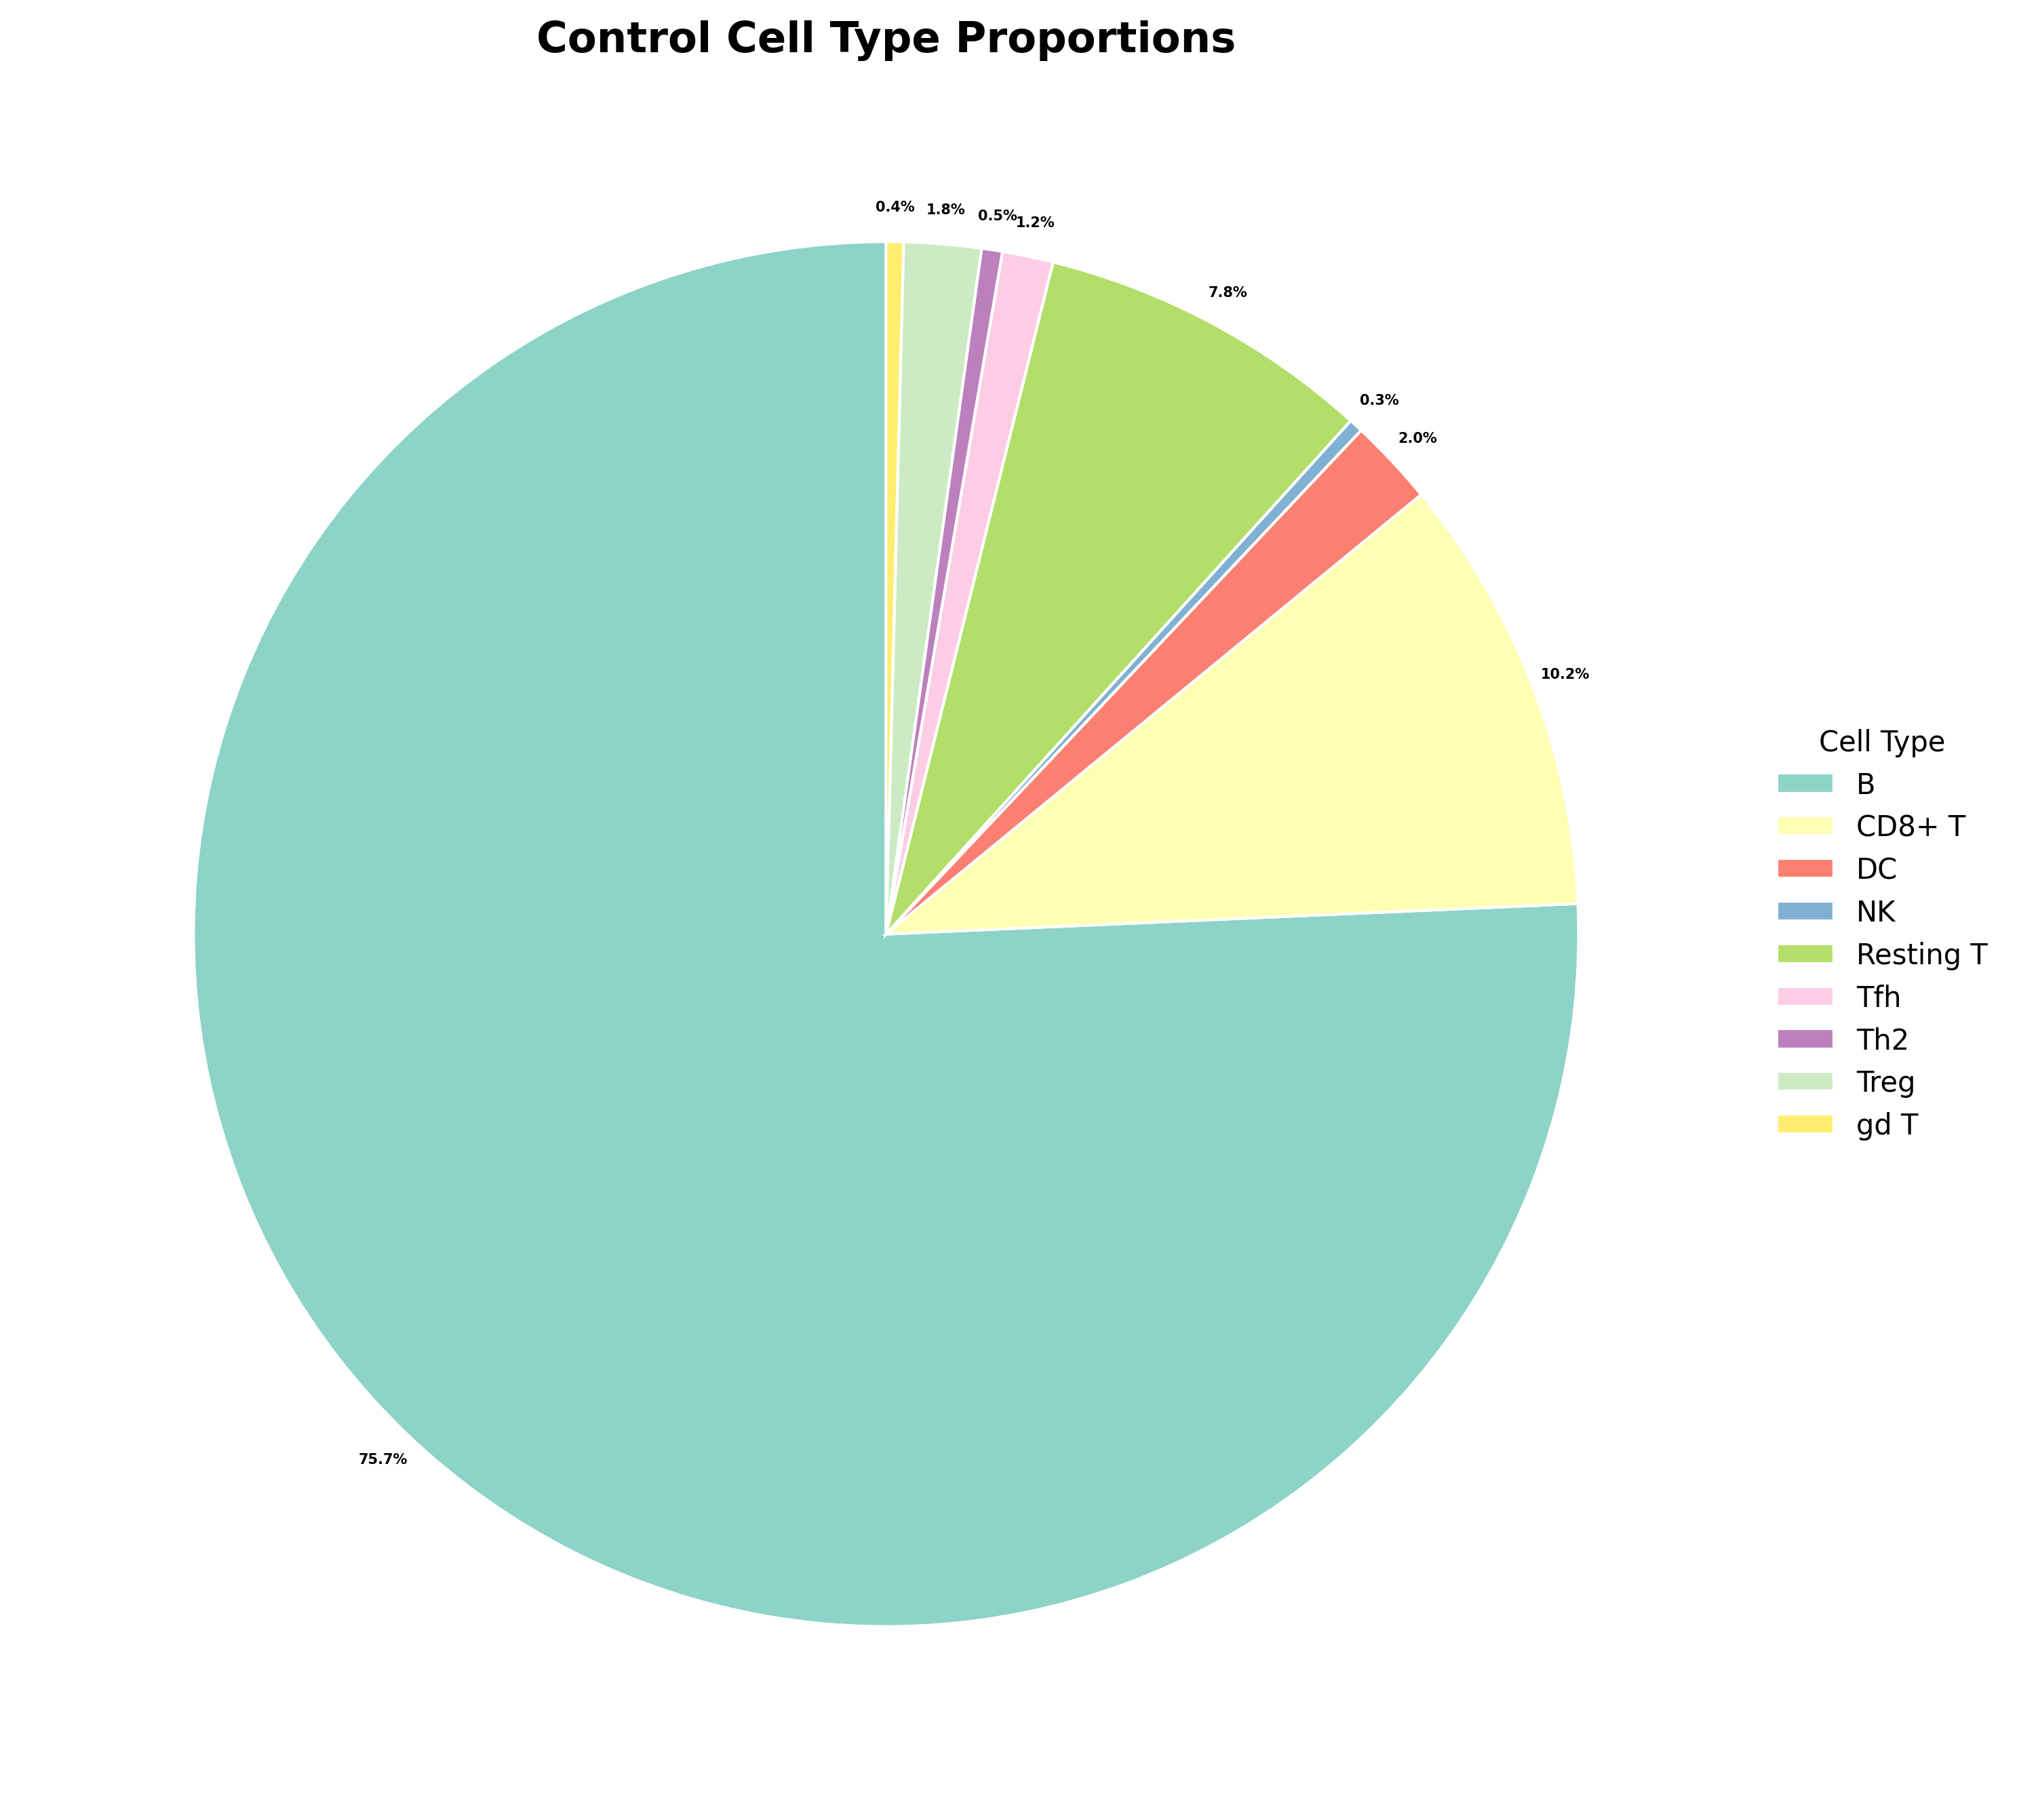

In [37]:
# Pie chart for Control
plot_celltype_pie(control_props, 'Control Cell Type Proportions', 'celltype_pie_control')

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: title={'center': 'Knockout Cell Type Proportions'}>)

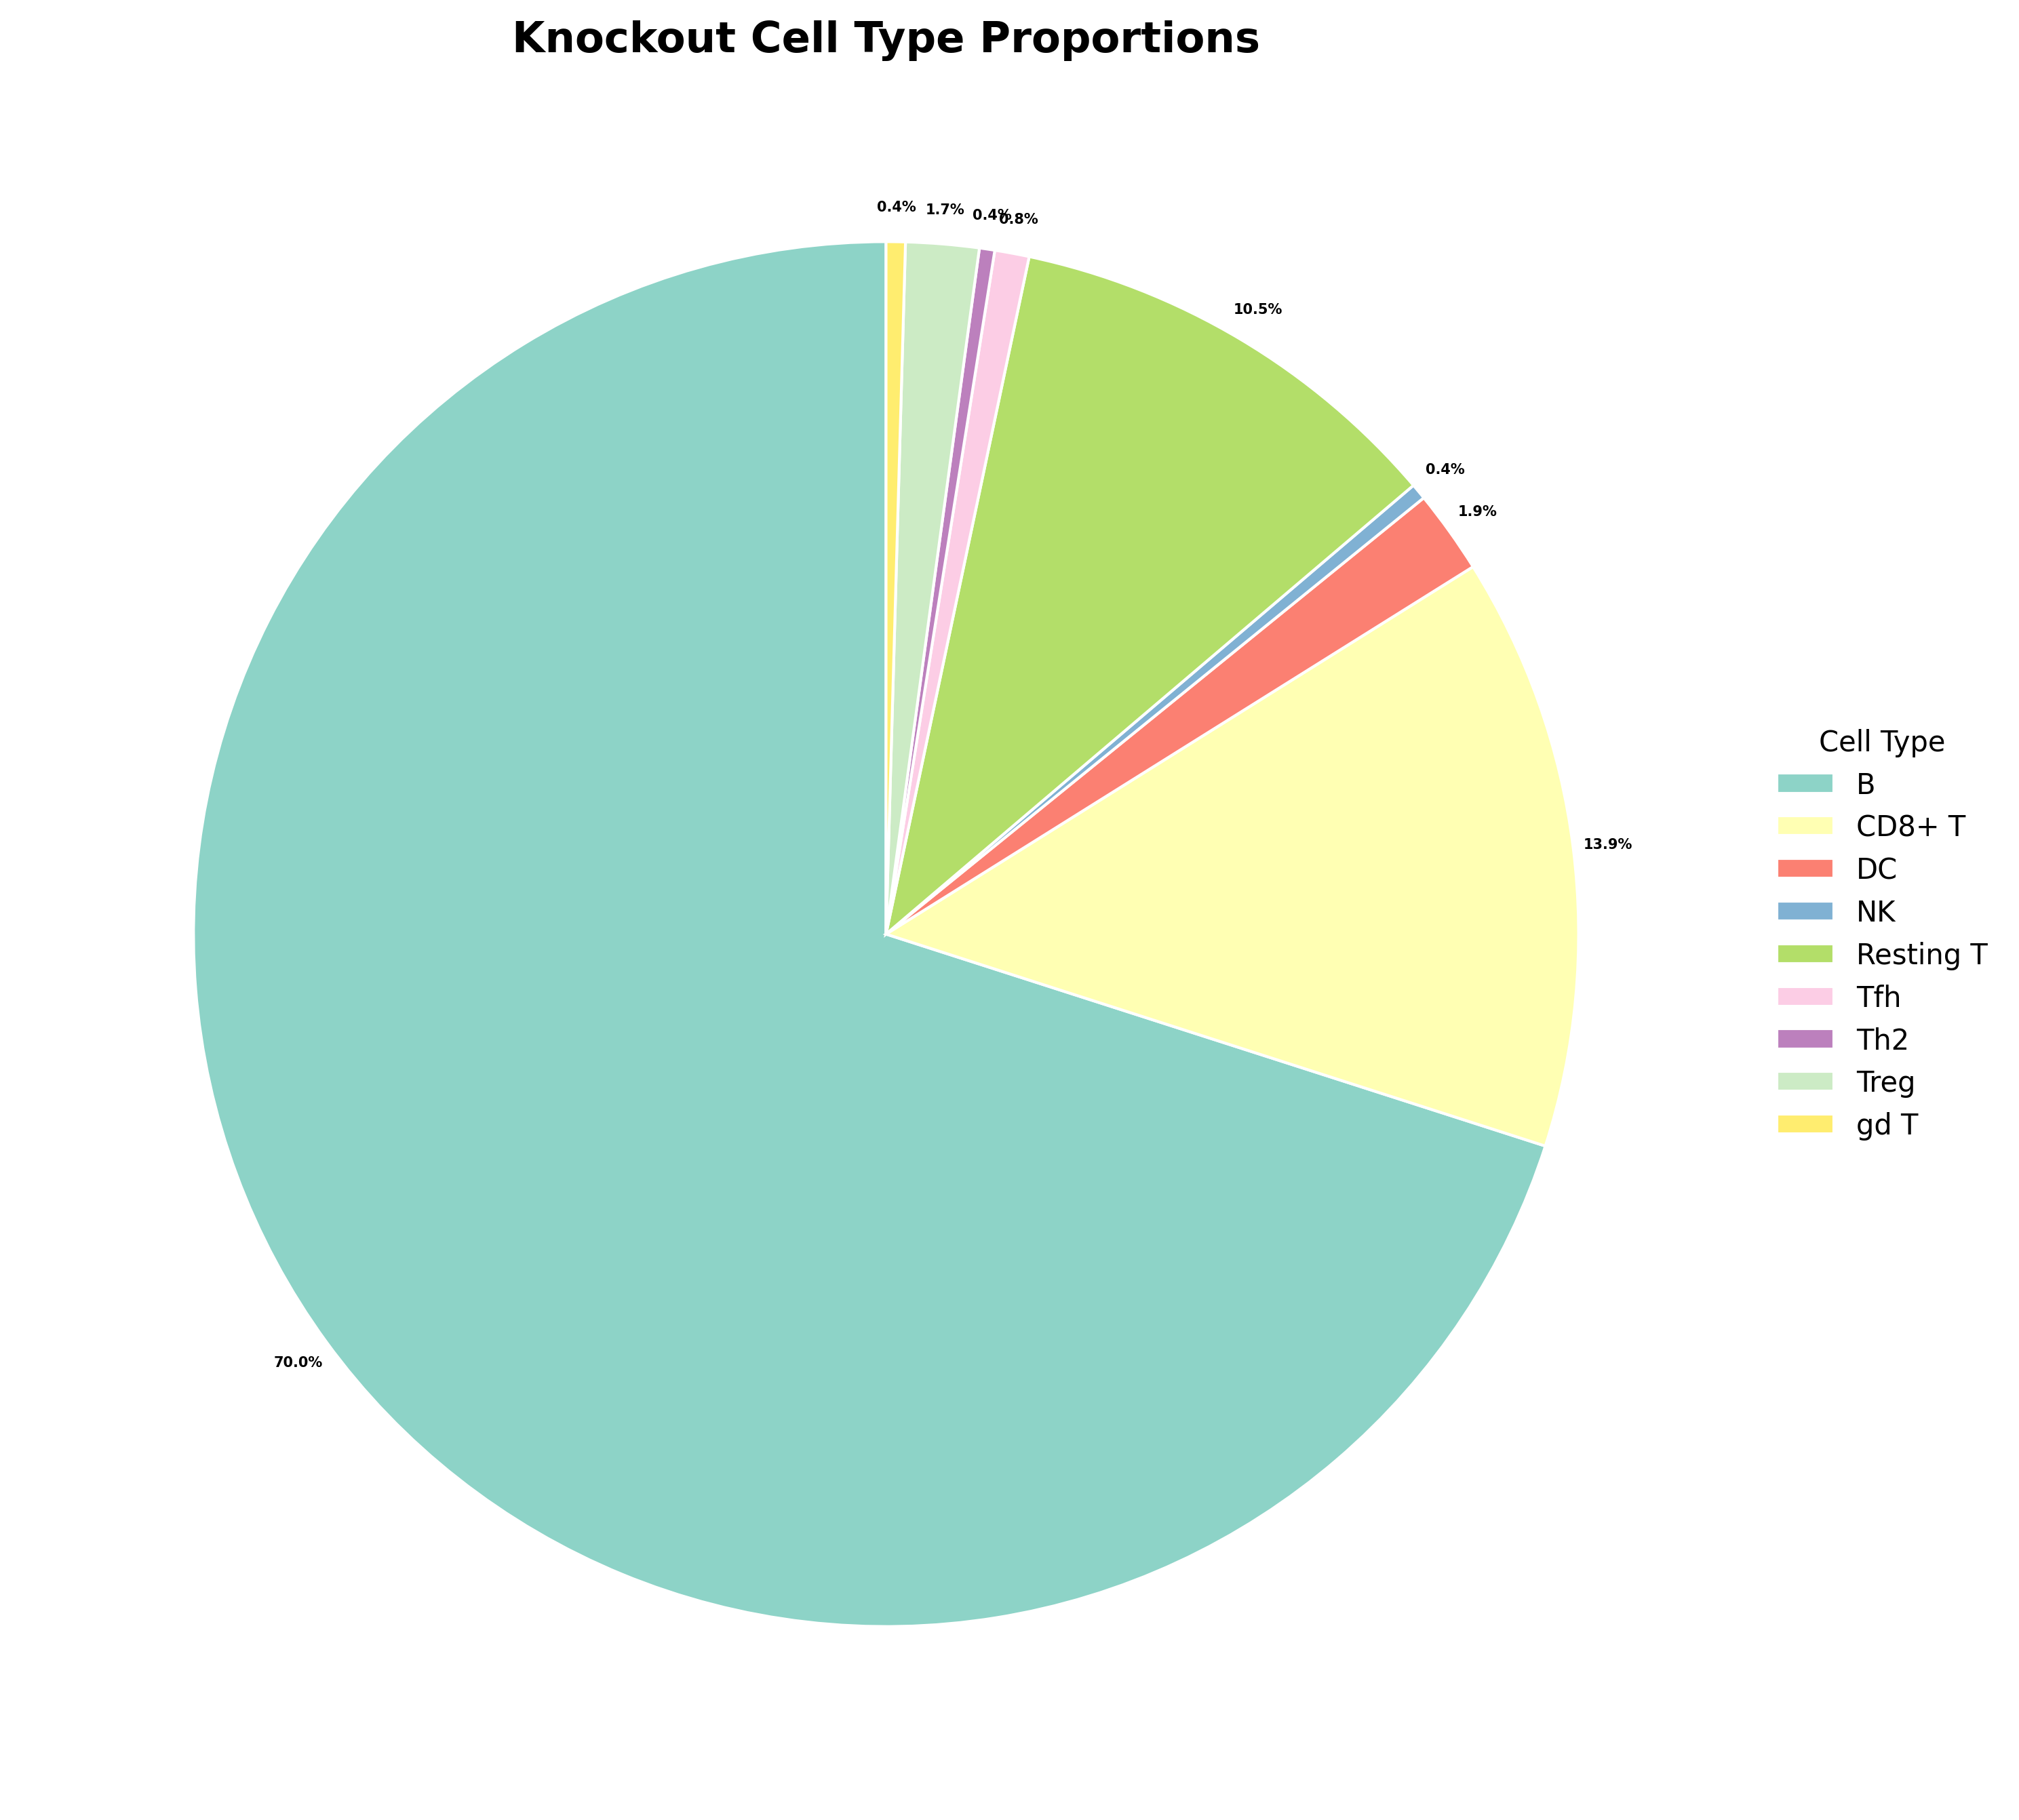

In [36]:
# Pie chart for Knockout
plot_celltype_pie(ko_props, 'Knockout Cell Type Proportions', 'celltype_pie_knockout')

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: title={'center': 'Knockout2 Celltype Proportions'}>)

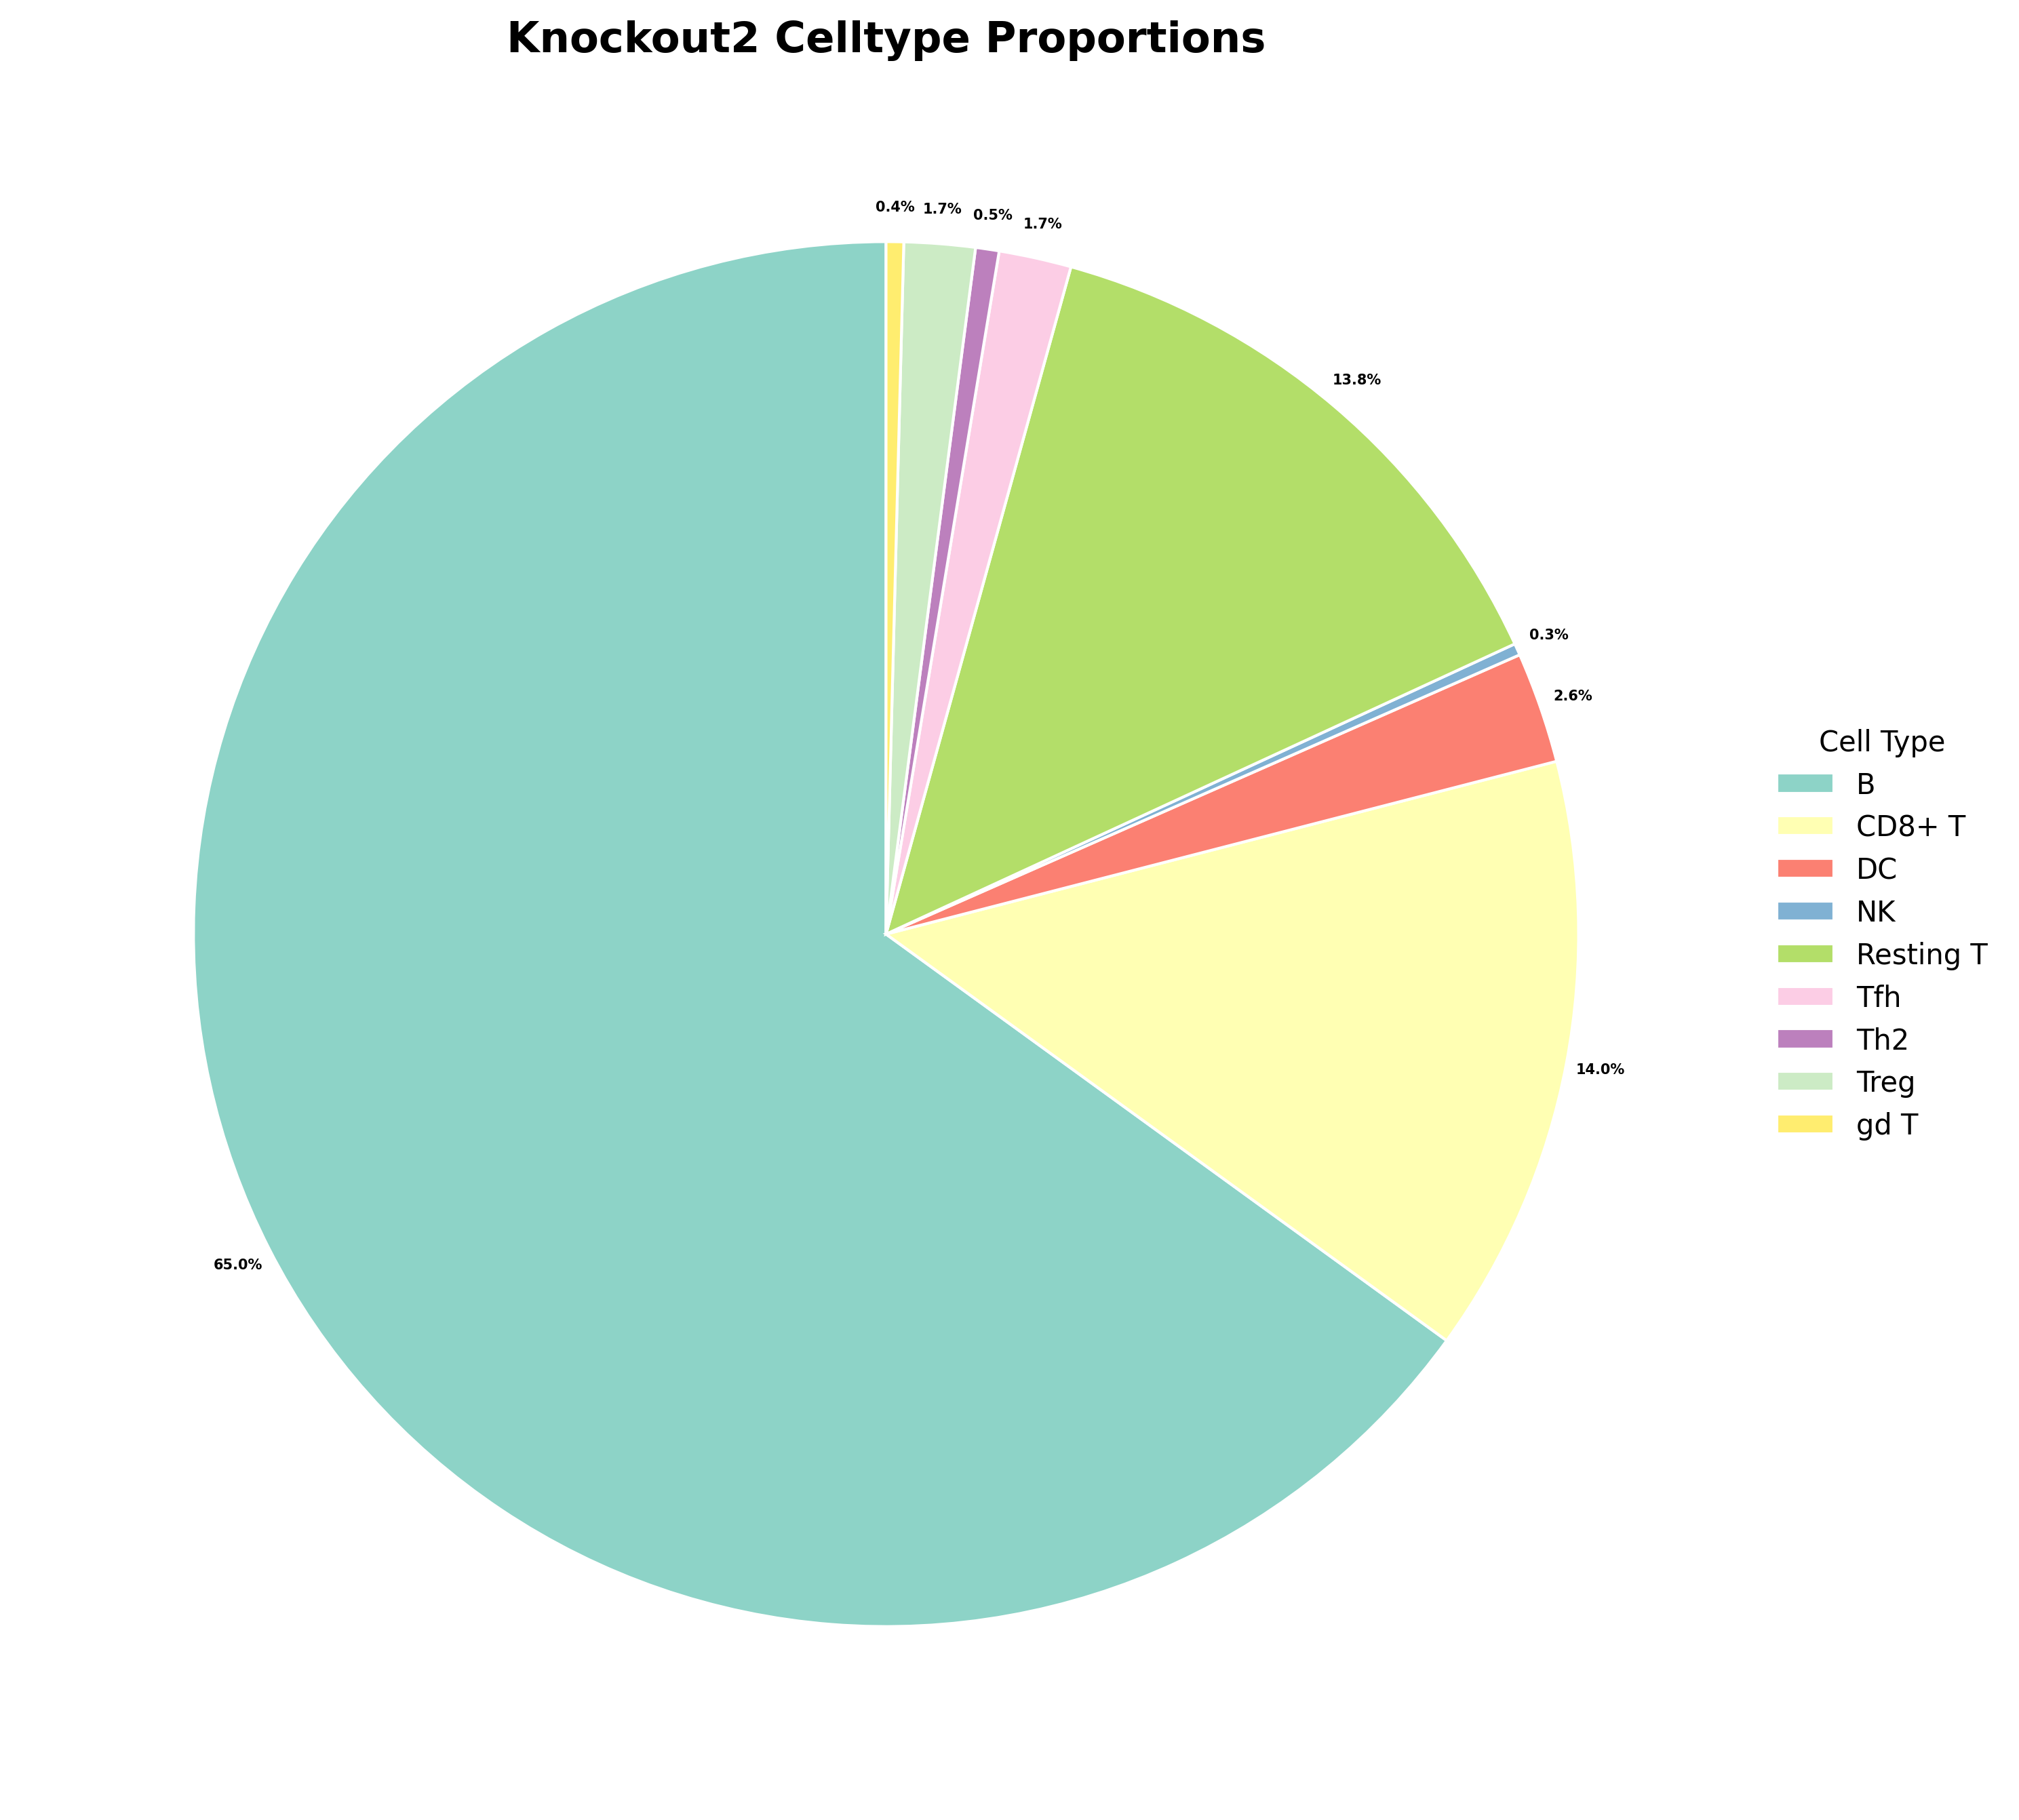

In [38]:
# Pie chart for Knockout2
plot_celltype_pie(ko2_props, 'Knockout2 Celltype Proportions', 'celltype_pie_knockout2')

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: title={'center': 'Slideseq Celltype Proportions'}>)

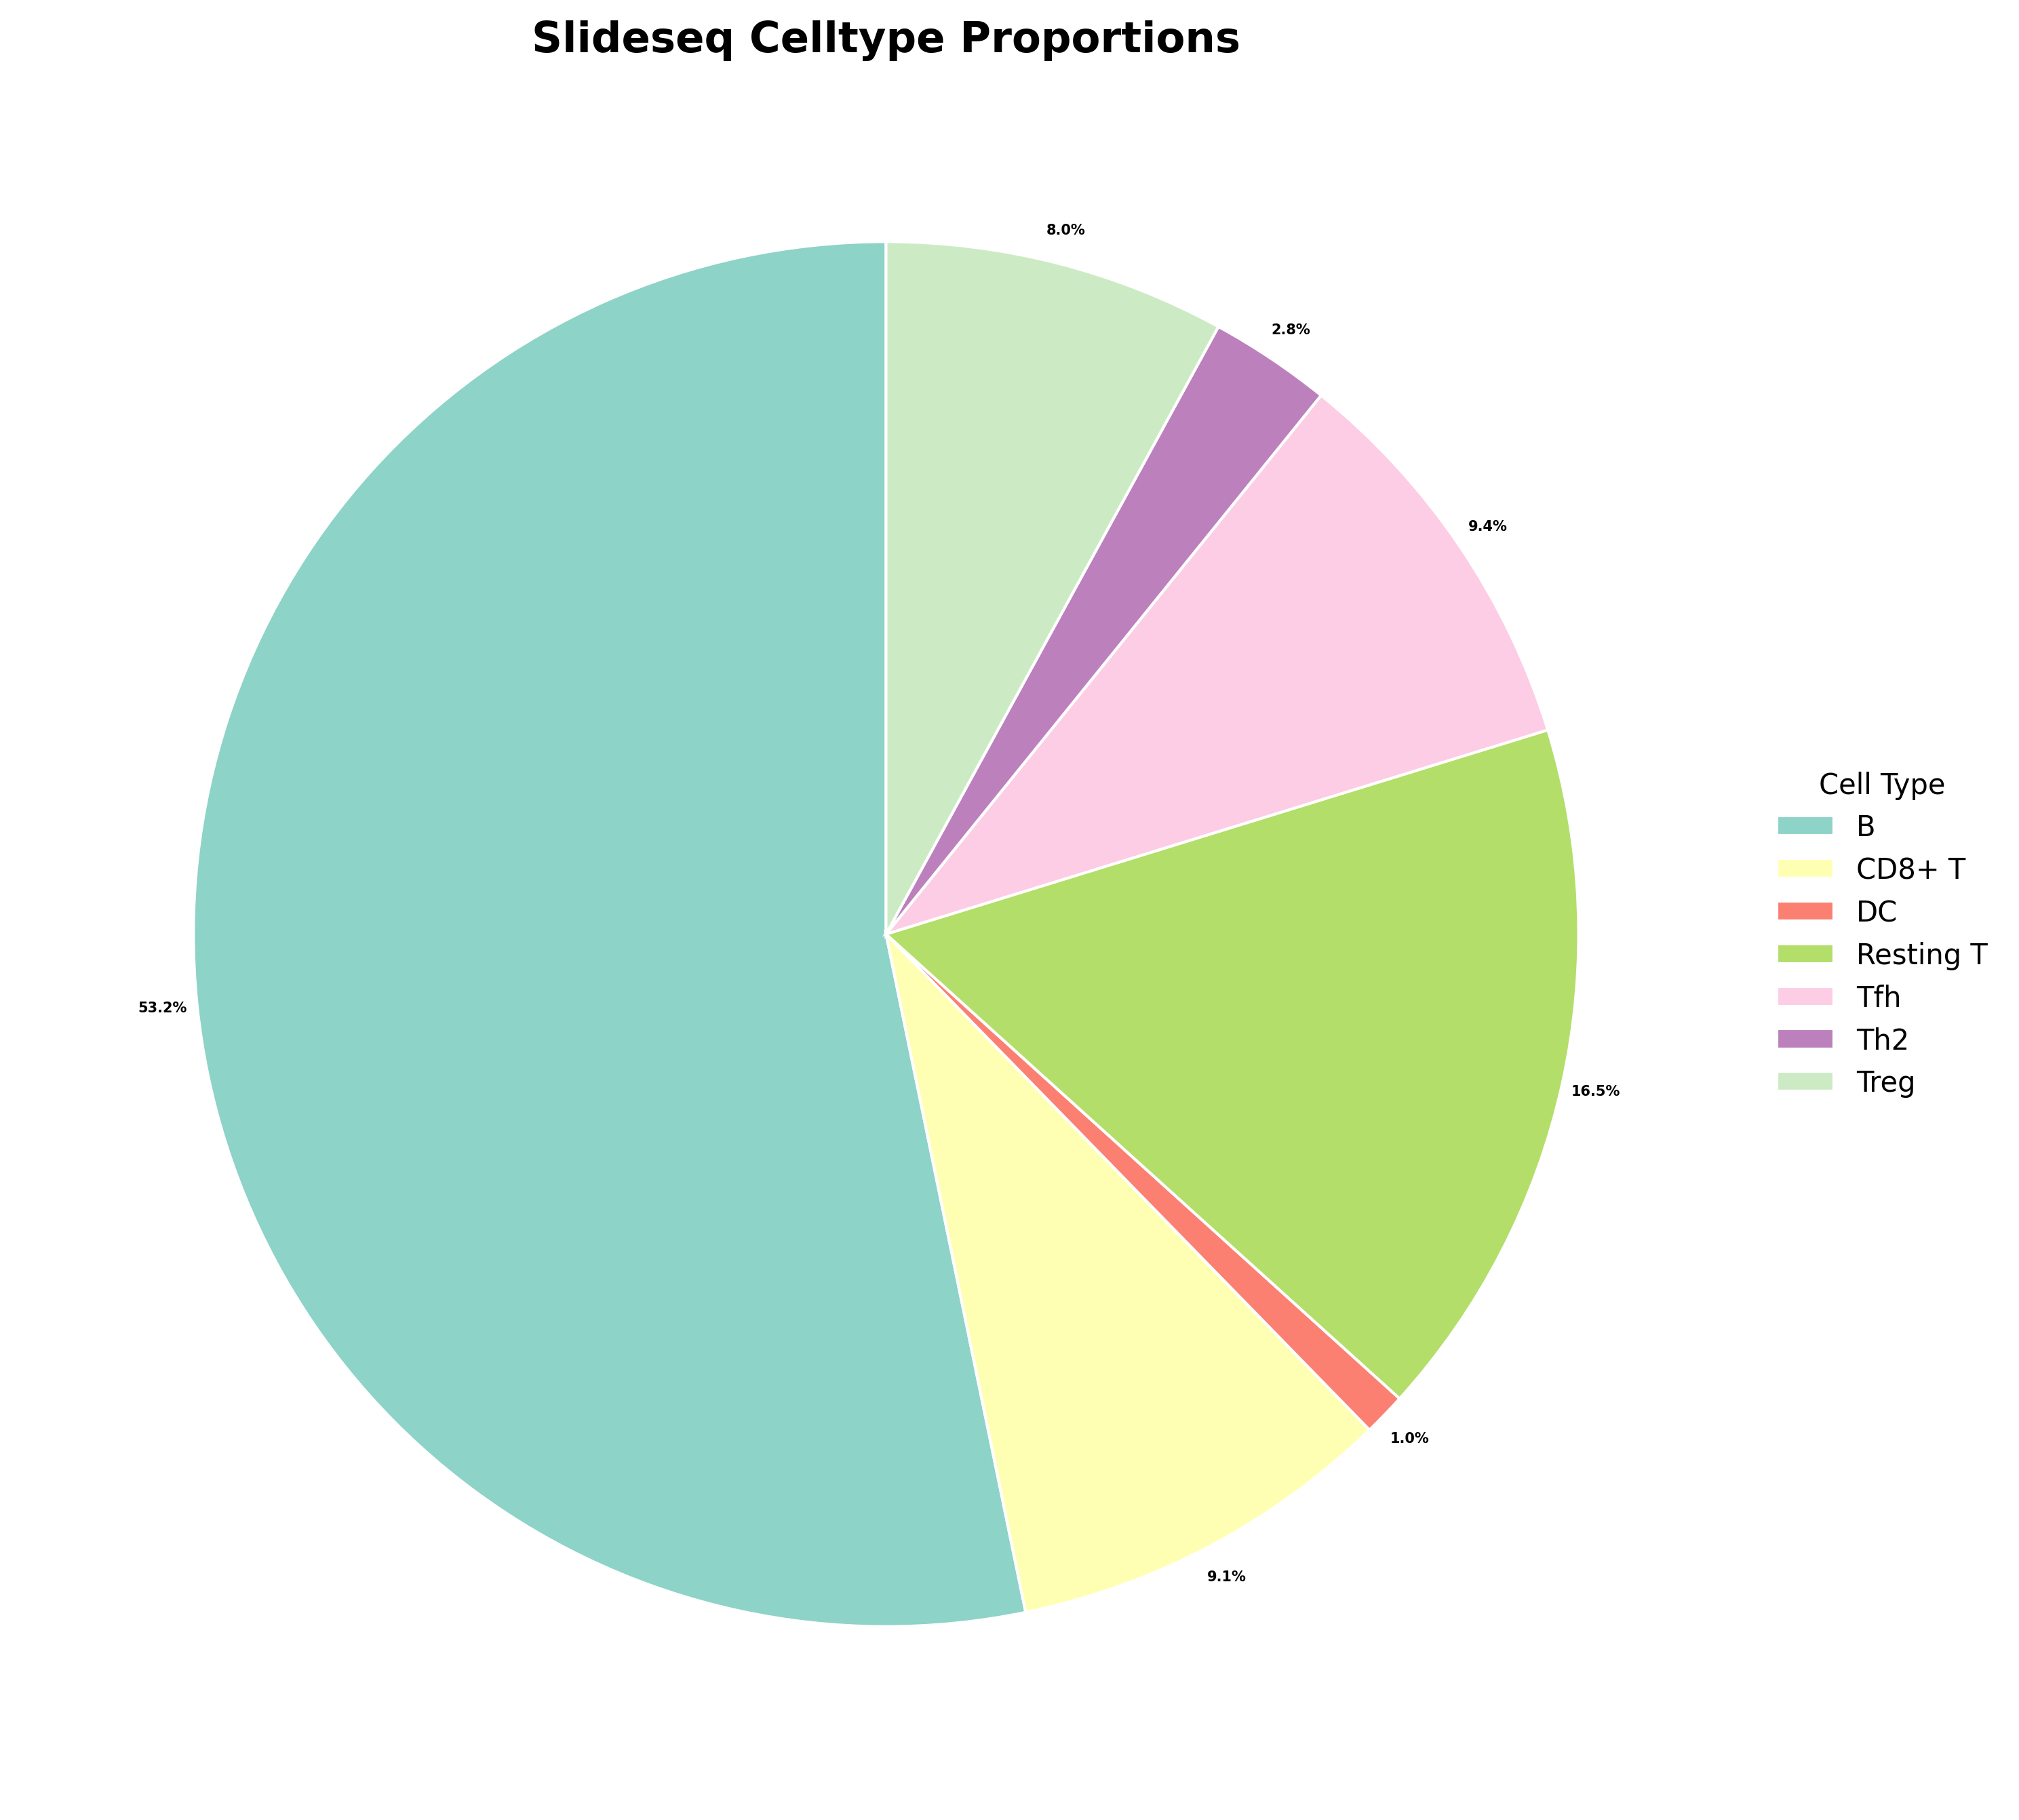

In [39]:
# Pie chart for All Slideseq
plot_celltype_pie(slideseq_props, 'Slideseq Celltype Proportions', 'celltype_pie_slideseq')

### Compute neighborhood composition

In [4]:
import pandas as pd 
radius = 30

In [5]:
spf_control = create_spatial_features(
    x=adata_control.obsm['spatial'][:, 0], 
    y=adata_control.obsm['spatial'][:, 1], 
    celltypes=adata_control.obs.cell_type, 
    obs_index=adata_control.obs_names,
    radius=radius,
)

In [6]:
spf_ko = create_spatial_features(
    x=adata_ko.obsm['spatial'][:, 0], 
    y=adata_ko.obsm['spatial'][:, 1], 
    celltypes=adata_ko.obs.cell_type, 
    obs_index=adata_ko.obs_names,
    radius=radius,
)


In [7]:
spf_ko2 = create_spatial_features(
    x=adata_ko2.obsm['spatial'][:, 0], 
    y=adata_ko2.obsm['spatial'][:, 1], 
    celltypes=adata_ko2.obs.cell_type, 
    obs_index=adata_ko2.obs_names,
    radius=radius,
)

In [8]:
spf_control.to_csv(f'/ix3/djishnu/alw399/SpaceOracle/notebooks/mouse_lymphnode_visiumHD/spf_control_{radius}.csv')
spf_ko.to_csv(f'/ix3/djishnu/alw399/SpaceOracle/notebooks/mouse_lymphnode_visiumHD/spf_ko_{radius}.csv')
spf_ko2.to_csv(f'/ix3/djishnu/alw399/SpaceOracle/notebooks/mouse_lymphnode_visiumHD/spf_ko2_{radius}.csv')


In [9]:
radius

30

In [5]:
spf_control = pd.read_csv(f'spf_control_{radius}.csv', index_col=0)
spf_ko = pd.read_csv(f'spf_ko_{radius}.csv', index_col=0)
spf_ko2 = pd.read_csv(f'spf_ko2_{radius}.csv', index_col=0)

spf_control.index = spf_control.index.astype(str)
spf_ko.index = spf_ko.index.astype(str)
spf_ko2.index = spf_ko2.index.astype(str)

### Box plots

In [6]:
def normalize_rows(df):
    row_sums = df.sum(axis=1)
    return df.div(row_sums, axis=0)


In [7]:
%%time 

spf_control = normalize_rows(spf_control)
spf_ko = normalize_rows(spf_ko)
spf_ko2 = normalize_rows(spf_ko2)

CPU times: user 38.4 ms, sys: 0 ns, total: 38.4 ms
Wall time: 56 ms


In [8]:
all_cell_types = adata_control.obs.cell_type.unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(all_cell_types)))

cmap = dict(zip(all_cell_types, colors))
cmap

{'B': array([0.55294118, 0.82745098, 0.78039216, 1.        ]),
 'CD8+ T': array([1.        , 1.        , 0.70196078, 1.        ]),
 'Resting T': array([0.98431373, 0.50196078, 0.44705882, 1.        ]),
 'DC': array([0.50196078, 0.69411765, 0.82745098, 1.        ]),
 'Th2': array([0.70196078, 0.87058824, 0.41176471, 1.        ]),
 'gd T': array([0.98823529, 0.80392157, 0.89803922, 1.        ]),
 'Tfh': array([0.7372549 , 0.50196078, 0.74117647, 1.        ]),
 'Treg': array([0.8       , 0.92156863, 0.77254902, 1.        ]),
 'NK': array([1.        , 0.92941176, 0.43529412, 1.        ])}

In [9]:
control_th2_1der = adata_control[adata_control.obs['cell_type'] == 'Th2']
control_th2_1der = control_th2_1der[control_th2_1der[:, 'Prdm1'].to_df(layer='raw_count').iloc[:, 0] > 0].obs.index

ko_th2_1der = adata_ko[adata_ko.obs['cell_type'] == 'Th2']
ko_th2_1der = ko_th2_1der[
      (ko_th2_1der[:, 'Prdm1'].to_df(layer='raw_count').iloc[:, 0] > 0)
    & (ko_th2_1der[:, 'Ccr4'].to_df(layer='raw_count').iloc[:, 0] < 1)].obs.index

ko2_th2_1der = adata_ko2[adata_ko2.obs['cell_type'] == 'Th2']
ko2_th2_1der = ko2_th2_1der[
      (ko2_th2_1der[:, 'Prdm1'].to_df(layer='raw_count').iloc[:, 0] > 0)
    & (ko2_th2_1der[:, 'Ccr4'].to_df(layer='raw_count').iloc[:, 0] < 1)].obs.index

len(control_th2_1der), len(ko_th2_1der), len(ko2_th2_1der)


(30, 17, 34)

In [10]:
# control_th2 = adata_control[adata_control.obs['cell_type'] == 'Th2'].obs.index
# ko_th2 = adata_ko[adata_ko.obs['cell_type'] == 'Th2'].obs.index
# ko2_th2 = adata_ko2[adata_ko2.obs['cell_type'] == 'Th2'].obs.index

# len(control_th2), len(ko_th2), len(ko2_th2)

B_within - Control vs KO: p = 0.3068
CD8+ T_within - Control vs KO: p = 0.1371

=== Summary Statistics ===
Control - B_within mean: 0.5271
KO - B_within mean: 0.5795
Control - CD8+ T_within mean: 0.1945
KO - CD8+ T_within mean: 0.1491

=== Pairwise Comparisons (Mann-Whitney U) ===
B_within - Control vs KO: p = 0.3068
CD8+ T_within - Control vs KO: p = 0.1371


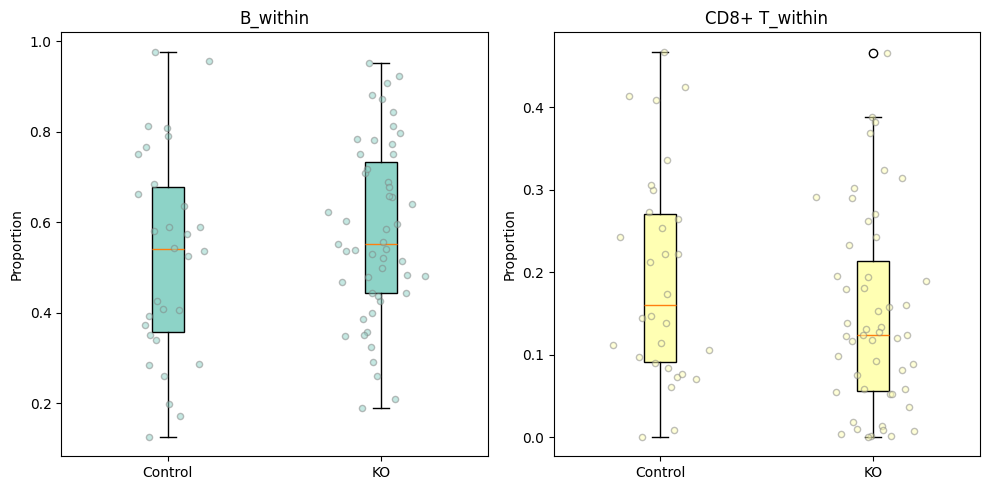

In [14]:
# Create box plots for B_within and CD8+ T_within only
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Get the data for each condition
control_data = spf_control.loc[control_th2_1der]
ko_data = pd.concat([spf_ko.loc[ko_th2_1der], spf_ko2.loc[ko2_th2_1der]])

# Filter to only include B_within and CD8+ T_within
all_keys = ['B_within', 'CD8+ T_within']

# Create figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Dictionary to store p-values for summary
p_values = {}

# Create box plots for each key
for i, key in enumerate(all_keys):
    control_values = control_data[key].dropna()
    ko_values = ko_data[key].dropna()
    
    # Skip if no data
    if len(control_values) == 0 or len(ko_values) == 0:
        continue
    
    data = [control_values, ko_values]
    bp = axes[i].boxplot(data, labels=['Control', 'KO'], patch_artist=True)
    
    # Color the boxes based on cell type
    cell_type = key.replace('_within', '')
    if cell_type in cmap:
        box_color = cmap[cell_type]
        for patch in bp['boxes']:
            patch.set_facecolor(box_color)
    
    # Add individual points with low alpha - using same color as box
    # Control points
    x_control = np.random.normal(1, 0.1, len(control_values))
    axes[i].scatter(x_control, control_values, alpha=0.5, s=20, color=box_color, zorder=10, edgecolor='gray')
    
    # KO points
    x_ko = np.random.normal(2, 0.1, len(ko_values))
    axes[i].scatter(x_ko, ko_values, alpha=0.5, s=20, color=box_color, zorder=10, edgecolor='gray')
    
    axes[i].set_title(key)
    axes[i].set_ylabel('Proportion')
    
    # Mann-Whitney U test
    _, p_value = stats.mannwhitneyu(control_values, ko_values, alternative='two-sided')
    p_values[key] = p_value
    
    print(f"{key} - Control vs KO: p = {p_value:.4f}")
    
    # Add significance annotation
    y_max = max([max(data) for data in data if len(data) > 0])
    if p_value < 0.05:
        y_pos = y_max + y_max*0.1
        axes[i].plot([1, 2], [y_pos, y_pos], 'k-', linewidth=1)
        axes[i].text(1.5, y_pos + y_max*0.02, '*', ha='center', fontsize=12, fontweight='bold')
        axes[i].set_ylim(0, y_max + y_max*0.2)

plt.tight_layout()
plt.savefig('neighborhood_boxplots_B_CD8T.svg', dpi=300, format='svg', transparent=True, bbox_inches='tight')

# Print the actual values and statistical results
print("\n=== Summary Statistics ===")
for key in all_keys:
    control_values = control_data[key].dropna()
    ko_values = ko_data[key].dropna()
    if len(control_values) > 0 and len(ko_values) > 0:
        print(f"Control - {key} mean: {control_values.mean():.4f}")
        print(f"KO - {key} mean: {ko_values.mean():.4f}")

print("\n=== Pairwise Comparisons (Mann-Whitney U) ===")
for key, p_value in p_values.items():
    print(f"{key} - Control vs KO: p = {p_value:.4f}")

B_within - Kruskal-Wallis test: p = 0.5637
B_within - Control vs KO: p = 0.5574
B_within - Control vs KO2: p = 0.2971
B_within - KO vs KO2: p = 0.7568
CD8+ T_within - Kruskal-Wallis test: p = 0.3087
CD8+ T_within - Control vs KO: p = 0.1239
CD8+ T_within - Control vs KO2: p = 0.2699
CD8+ T_within - KO vs KO2: p = 0.8651
DC_within - Kruskal-Wallis test: p = 0.6684
DC_within - Control vs KO: p = 0.5208
DC_within - Control vs KO2: p = 0.7417
DC_within - KO vs KO2: p = 0.3957
NK_within - Kruskal-Wallis test: p = 0.0475
NK_within - Control vs KO: p = 0.2605
NK_within - Control vs KO2: p = 0.0078
NK_within - KO vs KO2: p = 0.8870
Resting T_within - Kruskal-Wallis test: p = 0.9768
Resting T_within - Control vs KO: p = 0.9735
Resting T_within - Control vs KO2: p = 0.9946
Resting T_within - KO vs KO2: p = 0.7568
Tfh_within - Kruskal-Wallis test: p = 0.2117
Tfh_within - Control vs KO: p = 0.2184
Tfh_within - Control vs KO2: p = 0.4965
Tfh_within - KO vs KO2: p = 0.0909
Th2_within - Kruskal-Walli

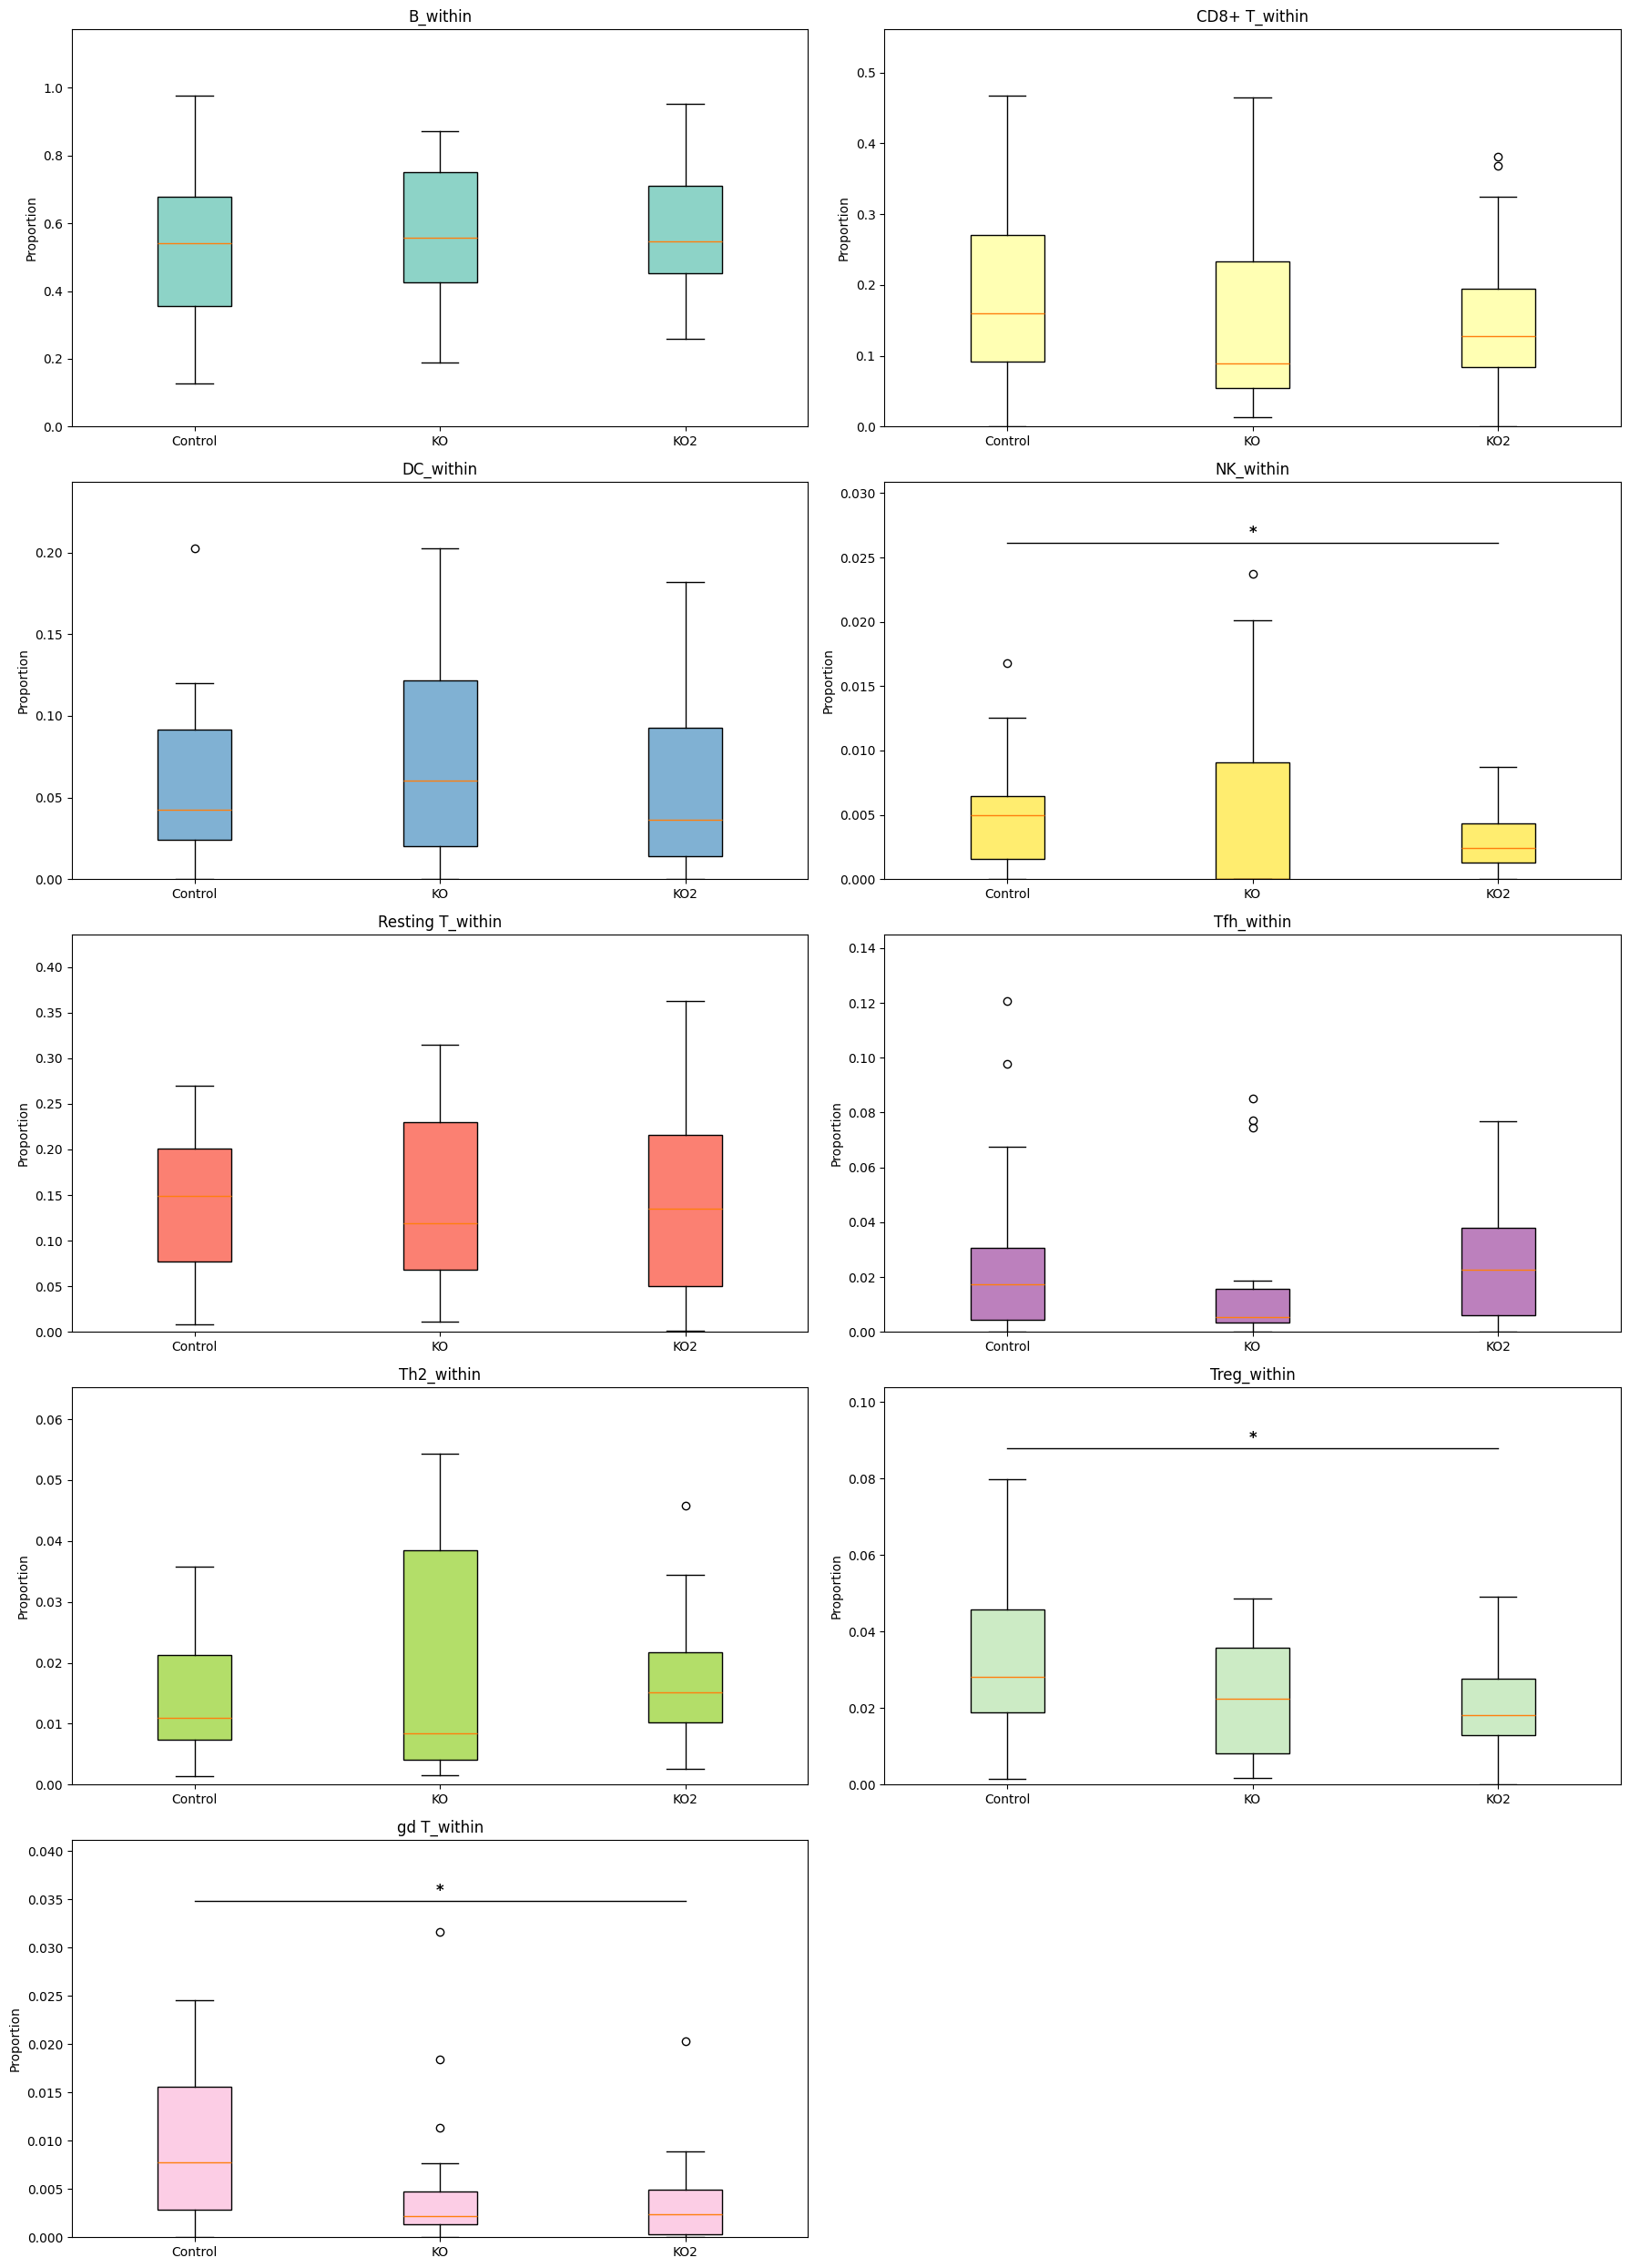

In [12]:
# Get the data for each condition
# control_data = spf_control.loc[control_th2]
# ko_data = spf_ko.loc[ko_th2]
# ko2_data = spf_ko2.loc[ko2_th2]
control_data = spf_control.loc[control_th2_1der]
ko_data = spf_ko.loc[ko_th2_1der]
ko2_data = spf_ko2.loc[ko2_th2_1der]

# Get all keys from control_data
all_keys = list(control_data.keys())

# Calculate number of rows and columns for subplot grid
n_keys = len(all_keys)
n_cols = 2
n_rows = (n_keys + n_cols - 1) // n_cols  # Ceiling division

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)

# Dictionary to store p-values
p_values = {}

# Process each key
for i, key in enumerate(all_keys):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    # Get data for this key
    control_values = control_data[key].dropna()
    ko_values = ko_data[key].dropna()
    ko2_values = ko2_data[key].dropna()
    
    data = [control_values, ko_values, ko2_values]
    bp = ax.boxplot(data, labels=['Control', 'KO', 'KO2'], patch_artist=True)
    
    # Color the boxes based on cell type
    cell_type = key.replace('_within', '')
    if cell_type in cmap:
        for patch in bp['boxes']:
            patch.set_facecolor(cmap[cell_type])
    
    ax.set_title(key)
    ax.set_ylabel('Proportion')
    
    # Kruskal-Wallis test
    _, p_kw = stats.kruskal(control_values, ko_values, ko2_values)
    
    # Pairwise Mann-Whitney U tests
    _, p_control_ko = stats.mannwhitneyu(control_values, ko_values, alternative='two-sided')
    _, p_control_ko2 = stats.mannwhitneyu(control_values, ko2_values, alternative='two-sided')
    _, p_ko_ko2 = stats.mannwhitneyu(ko_values, ko2_values, alternative='two-sided')
    
    p_values[key] = {
        'kruskal_wallis': p_kw,
        'control_ko': p_control_ko,
        'control_ko2': p_control_ko2,
        'ko_ko2': p_ko_ko2
    }
    
    print(f"{key} - Kruskal-Wallis test: p = {p_kw:.4f}")
    print(f"{key} - Control vs KO: p = {p_control_ko:.4f}")
    print(f"{key} - Control vs KO2: p = {p_control_ko2:.4f}")
    print(f"{key} - KO vs KO2: p = {p_ko_ko2:.4f}")
    
    # Add significance annotations
    y_max = max([max(data) for data in data if len(data) > 0])
    y_offset = y_max * 0.1
    current_y = y_max + y_offset
    
    # Check pairwise comparisons and add significance bars
    if p_control_ko < 0.05:
        ax.plot([1, 2], [current_y, current_y], 'k-', linewidth=1)
        ax.text(1.5, current_y + y_max*0.02, '*', ha='center', fontsize=12, fontweight='bold')
        current_y += y_offset
    
    if p_control_ko2 < 0.05:
        ax.plot([1, 3], [current_y, current_y], 'k-', linewidth=1)
        ax.text(2, current_y + y_max*0.02, '*', ha='center', fontsize=12, fontweight='bold')
        current_y += y_offset
    
    if p_ko_ko2 < 0.05:
        ax.plot([2, 3], [current_y, current_y], 'k-', linewidth=1)
        ax.text(2.5, current_y + y_max*0.02, '*', ha='center', fontsize=12, fontweight='bold')
    
    ax.set_ylim(0, current_y + y_max*0.1)

# Hide empty subplots
for i in range(len(all_keys), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
# plt.savefig('neighborhood_boxplots.svg', dpi=300, format='svg', transparent=True, bbox_inches='tight')

# Print the actual values and statistical results
print("\n=== Summary Statistics ===")
for key in all_keys:
    control_values = control_data[key].dropna()
    ko_values = ko_data[key].dropna()
    ko2_values = ko2_data[key].dropna()
    if len(control_values) > 0 and len(ko_values) > 0 and len(ko2_values) > 0:
        print(f"Control - {key} mean: {control_values.mean():.4f}")
        print(f"KO - {key} mean: {ko_values.mean():.4f}")
        print(f"KO2 - {key} mean: {ko2_values.mean():.4f}")

print("\n=== Statistical Tests ===")
for key, p_dict in p_values.items():
    print(f"{key} - Kruskal-Wallis: p = {p_dict['kruskal_wallis']:.4f}")

print("\n=== Pairwise Comparisons (Mann-Whitney U) ===")
for key, p_dict in p_values.items():
    print(f"{key} - Control vs KO: p = {p_dict['control_ko']:.4f}")
    print(f"{key} - Control vs KO2: p = {p_dict['control_ko2']:.4f}")
    print(f"{key} - KO vs KO2: p = {p_dict['ko_ko2']:.4f}")

### Average bar plots

In [133]:
nbrs_control = {}
for cell_type in adata_control.obs.cell_type.unique():
    nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]

control_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    control_means[cell_type] = nbrs_control[cell_type].astype(float).mean() 
control_means = {k: v / v.sum() for k, v in control_means.items()}

In [43]:
adata_control.obs.cell_type = adata_control.obs.cell_type.astype(str)

In [44]:
nbrs_ko = {}
for cell_type in adata_ko.obs.cell_type.unique():
    nbrs_ko[cell_type] = spf_ko[adata_ko.obs.cell_type == cell_type]

ko_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    ko_means[cell_type] = nbrs_ko[cell_type].astype(float).mean() 
ko_means = {k: v / v.sum() for k, v in ko_means.items()}



In [45]:
nbrs_ko2 = {}
for cell_type in adata_ko2.obs.cell_type.unique():
    nbrs_ko2[cell_type] = spf_ko2[adata_ko2.obs.cell_type == cell_type]

ko2_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    ko2_means[cell_type] = nbrs_ko2[cell_type].astype(float).mean() 
ko2_means = {k: v / v.sum() for k, v in ko2_means.items()}



In [101]:
# spf_ss = create_spatial_features(
#     x=adata_slideseq.obsm['spatial'][:, 0], 
#     y=adata_slideseq.obsm['spatial'][:, 1], 
#     celltypes=adata_slideseq.obs.cell_type, 
#     obs_index=adata_slideseq.obs_names
# )

# nbrs_ss = {}
# for cell_type in adata_slideseq.obs.cell_type.unique():
#     nbrs_ss[cell_type] = spf_ss[adata_slideseq.obs.cell_type == cell_type]

# ss_means = {}
# for cell_type in nbrs_ss.keys():
#     # Convert to numeric values before calculating mean
#     ss_means[cell_type] = nbrs_ss[cell_type].astype(float).mean() 
# ss_means = {k: v / v.sum() for k, v in ss_means.items()}

In [102]:
# # Random sample cells from each cell type
# nbrs_control = {}
# nbrs_ko = {}

# for cell_type in adata_control.obs.cell_type.unique():
#     # Get indices for cells of this type in control
#     ncells = adata_control[adata_control.obs.cell_type == cell_type].shape[0]
#     nbrs_control[cell_type] = spf_control.loc[np.random.choice(adata_control.obs_names, size=ncells, replace=False)] 

#     ncells = adata_ko[adata_ko.obs.cell_type == cell_type].shape[0]
#     nbrs_ko[cell_type] = spf_ko.loc[np.random.choice(adata_ko.obs_names, size=ncells, replace=False)]

In [103]:
# # Remove B_within 

# control_means = {}
# for cell_type in nbrs_control.keys():
#     # Convert to numeric values before calculating mean
#     control_means[cell_type] = nbrs_control[cell_type].astype(float).mean() 
#     control_means[cell_type] = control_means[cell_type].drop('B_within')
# control_means = {k: v / v.sum() for k, v in control_means.items()}

# ko_means = {}
# for cell_type in nbrs_control.keys():
#     # Convert to numeric values before calculating mean
#     ko_means[cell_type] = nbrs_ko[cell_type].astype(float).mean() 
#     ko_means[cell_type] = ko_means[cell_type].drop('B_within')
# ko_means = {k: v / v.sum() for k, v in ko_means.items()}

# ko2_means = {}
# for cell_type in nbrs_control.keys():
#     # Convert to numeric values before calculating mean
#     ko2_means[cell_type] = nbrs_ko2[cell_type].astype(float).mean() 
#     ko2_means[cell_type] = ko2_means[cell_type].drop('B_within')
# ko2_means = {k: v / v.sum() for k, v in ko2_means.items()}


### Unstacked bar plot

In [ ]:
cmap = {f'{ct}_within' : color for color, ct in zip(colors, all_cell_types)}
cmap

In [61]:
# Prepare data for unstacked bar plot
plot_data = []
for ct in control_means.keys():
    # Add control data
    for cell_type, prop in control_means[ct].items():
        plot_data.append({
            'cell_type': cell_type,
            'proportion': prop,
            'neighborhood': ct,
            'condition': 'Control'
        })
    # Add knockout data
    for cell_type, prop in ko_means[ct].items():
        plot_data.append({
            'cell_type': cell_type,
            'proportion': prop,
            'neighborhood': ct,
            'condition': 'Knockout'
        })
    for cell_type, prop in ko2_means[ct].items():
        plot_data.append({
            'cell_type': cell_type,
            'proportion': prop,
            'neighborhood': ct,
            'condition': 'Knockout2'
        })

df = pd.DataFrame(plot_data)

In [ ]:
df = df[df.cell_type.isin(['B_within', 'CD8+ T_within'])]

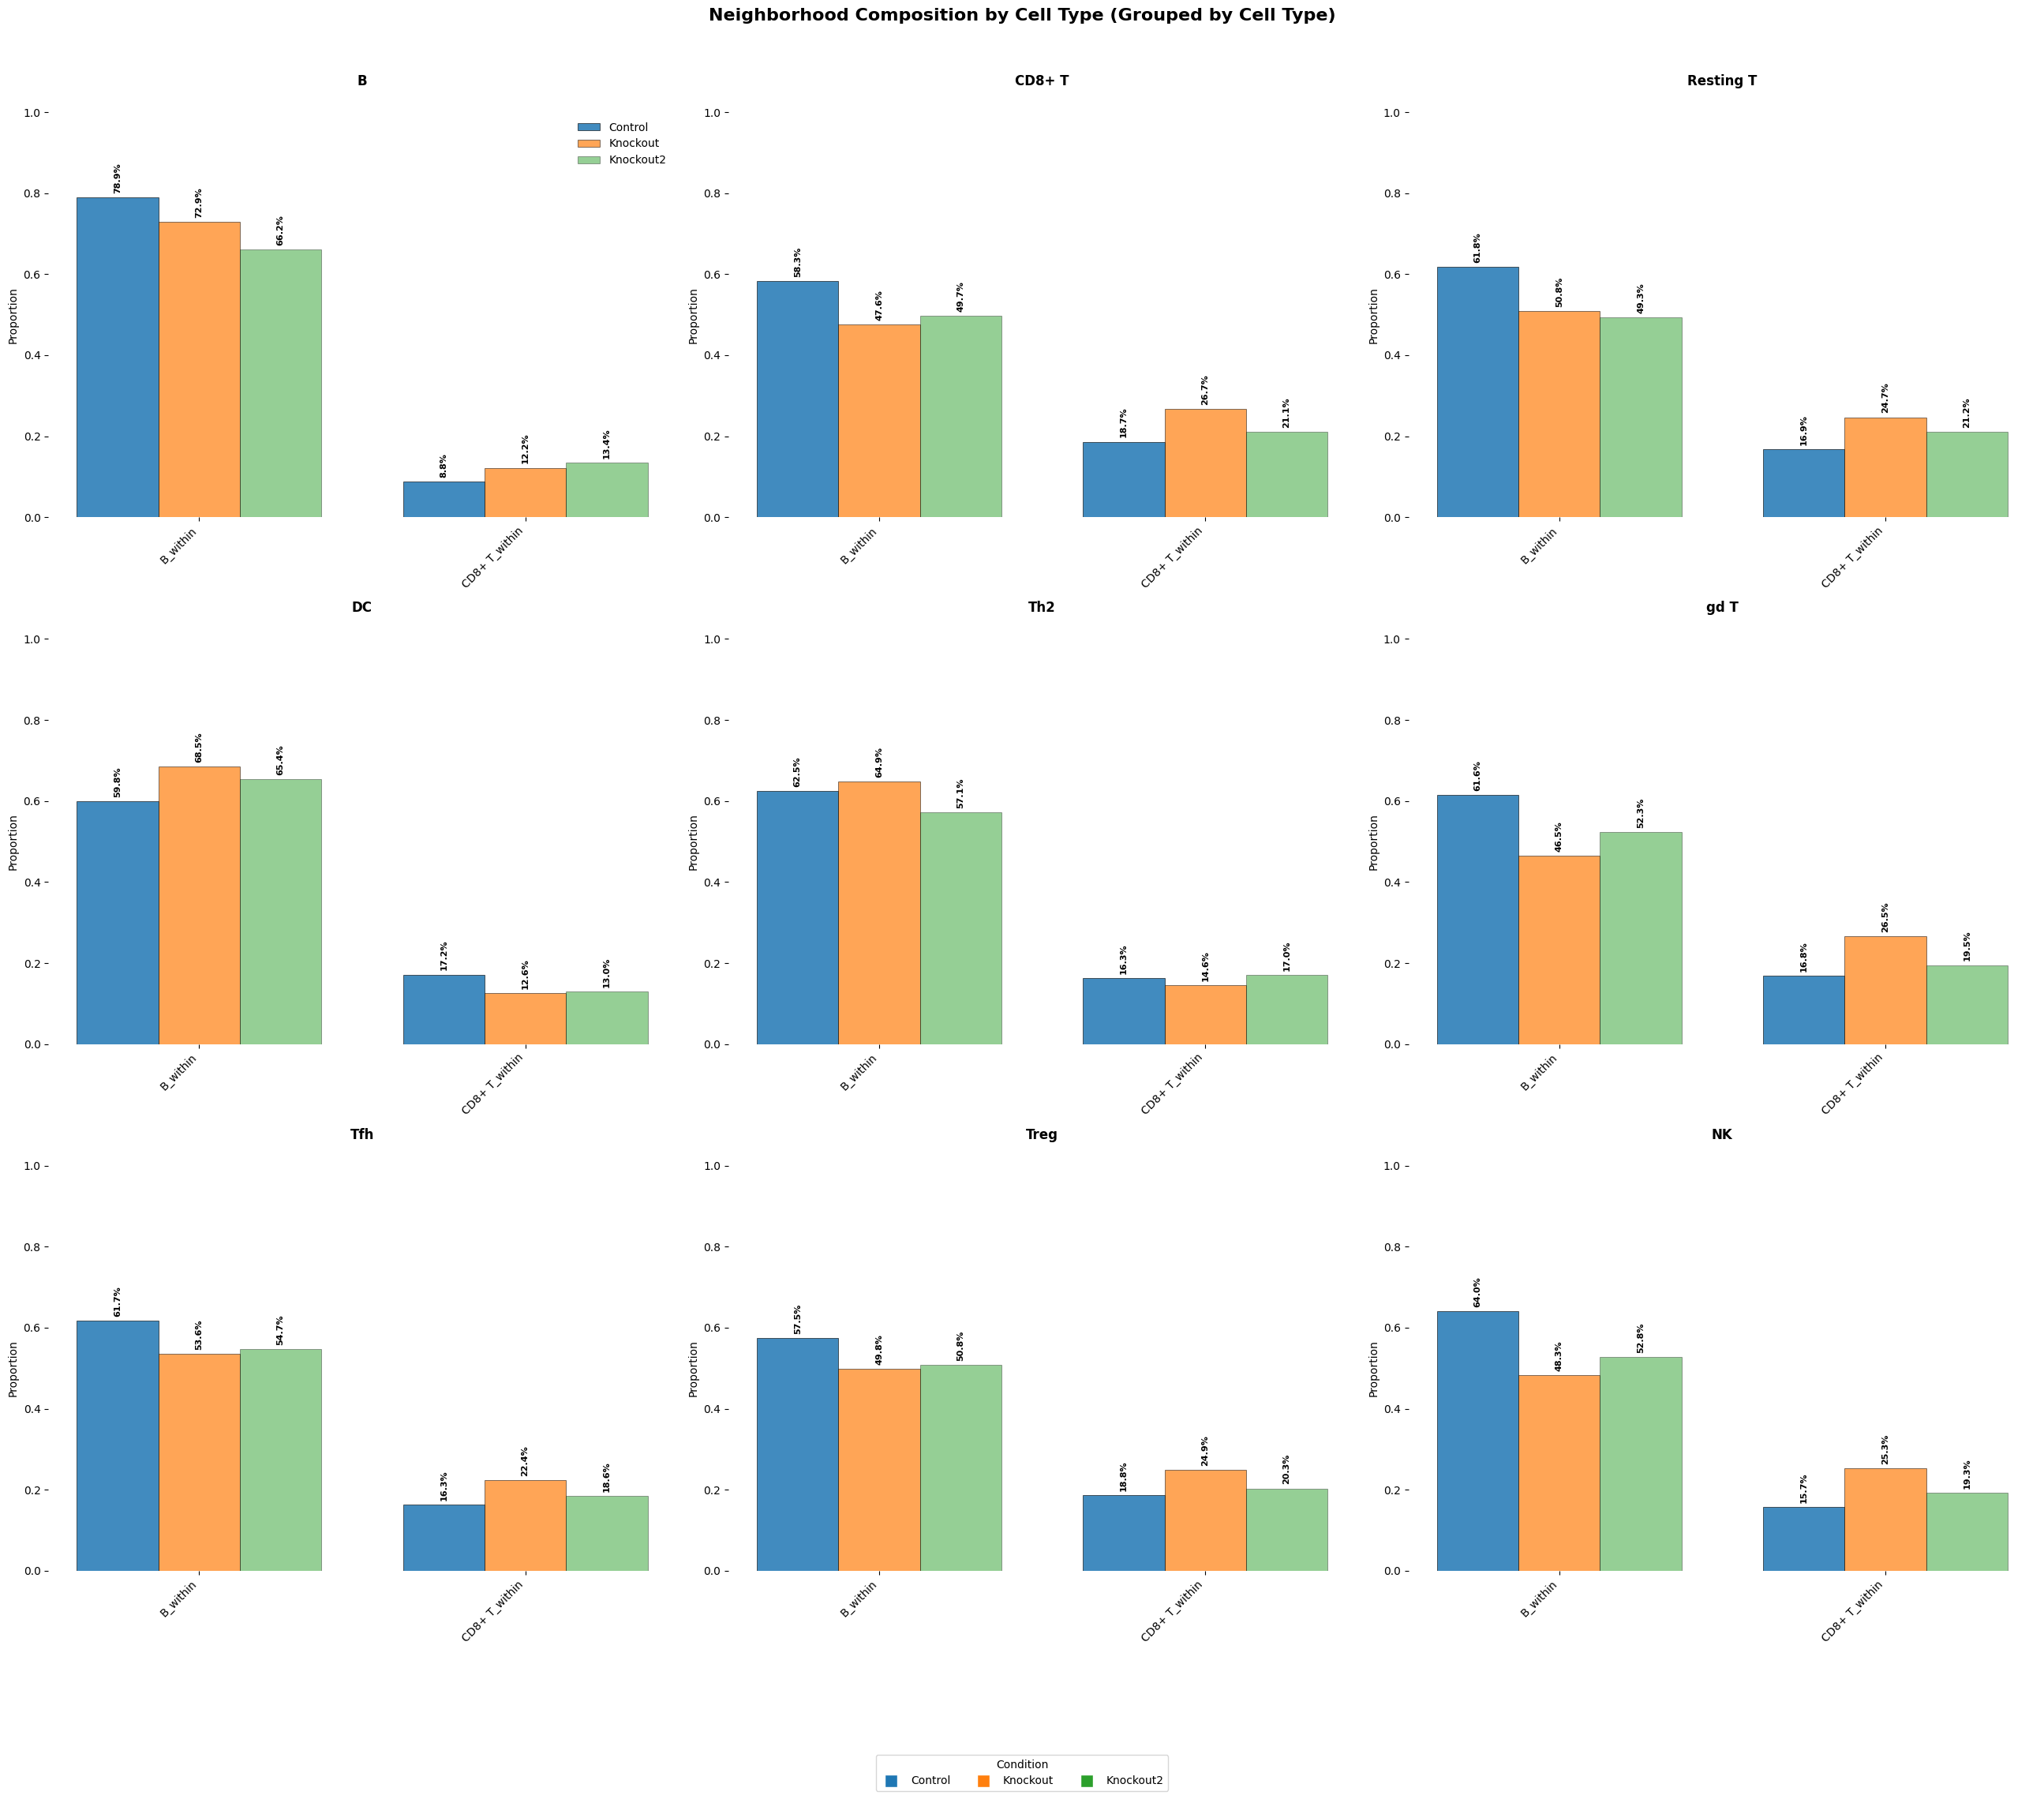

In [105]:
# Get unique neighborhoods and create subplots
neighborhoods = df['neighborhood'].unique()
n_neighborhoods = len(neighborhoods)
n_cols = 3
n_rows = (n_neighborhoods + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, 22))
axes = axes.flatten() if n_neighborhoods > 1 else [axes]

# Get unique cell types and conditions
cell_types = df['cell_type'].unique()
conditions = ['Control', 'Knockout', 'Knockout2']

# Colors for conditions
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
color_map = dict(zip(conditions, colors))

for i, neighborhood in enumerate(neighborhoods):
    ax = axes[i]
    # Filter data for this neighborhood
    neighborhood_data = df[df['neighborhood'] == neighborhood]
    
    # Create x positions for cell types
    x = np.arange(len(cell_types))
    bar_width = 0.25  # Width of each bar
    
    # Plot bars for each condition
    for j, condition in enumerate(conditions):
        proportions = []
        for cell_type in cell_types:
            cond_cell_data = neighborhood_data[
                (neighborhood_data['condition'] == condition) & 
                (neighborhood_data['cell_type'] == cell_type)
            ]
            # Get proportion or 0 if no data
            prop = cond_cell_data['proportion'].iloc[0] if len(cond_cell_data) > 0 else 0
            proportions.append(prop)
        
        # Plot bars for this condition across all cell types
        bars = ax.bar(
            x + j * bar_width,  # Offset bars for different conditions
            proportions,
            width=bar_width,
            color=color_map[condition],
            label=condition,
            alpha=0.85 if condition == 'Control' else (0.7 if condition == 'Knockout' else 0.5),
            edgecolor='black',
            linewidth=0.5
        )
        
        # Add value labels
        for k, rect in enumerate(bars):
            value = proportions[k]
            if value > 0.01:
                ax.text(rect.get_x() + rect.get_width()/2., rect.get_height() + 0.01,
                        f'{value:.1%}', ha='center', va='bottom', fontsize=8, 
                        fontweight='bold', rotation=90)
    
    ax.set_title(f'{neighborhood}', fontsize=12, fontweight='bold', y=1.05)
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 1)
    ax.set_xticks(x + bar_width)  # Center the ticks between the three bars for each cell type
    ax.set_xticklabels(cell_types, rotation=45, ha='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Add legend for conditions only to the first subplot
    if i == 0:
        ax.legend(conditions, loc='upper right', fontsize=10, frameon=False)

# Remove empty subplots
for i in range(n_neighborhoods, len(axes)):
    fig.delaxes(axes[i])

# Add color legend for conditions at the bottom
legend_elements = [plt.Line2D([0], [0], marker='s', color='w', label=condition,
                              markerfacecolor=color_map[condition], markersize=12)
                   for condition in conditions]
fig.legend(legend_elements, conditions, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(conditions), fontsize=10, title="Condition")

plt.suptitle('Neighborhood Composition by Cell Type (Grouped by Cell Type)',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.3)

plt.savefig(f'neighborhood_composition_radius{radius}_B_CD8_only.svg', 
            dpi=300, transparent=True, bbox_inches='tight', format='svg')

/tmp/ipykernel_8606/3032740445.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/3032740445.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/3032740445.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/3032740445.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/3032740445.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/

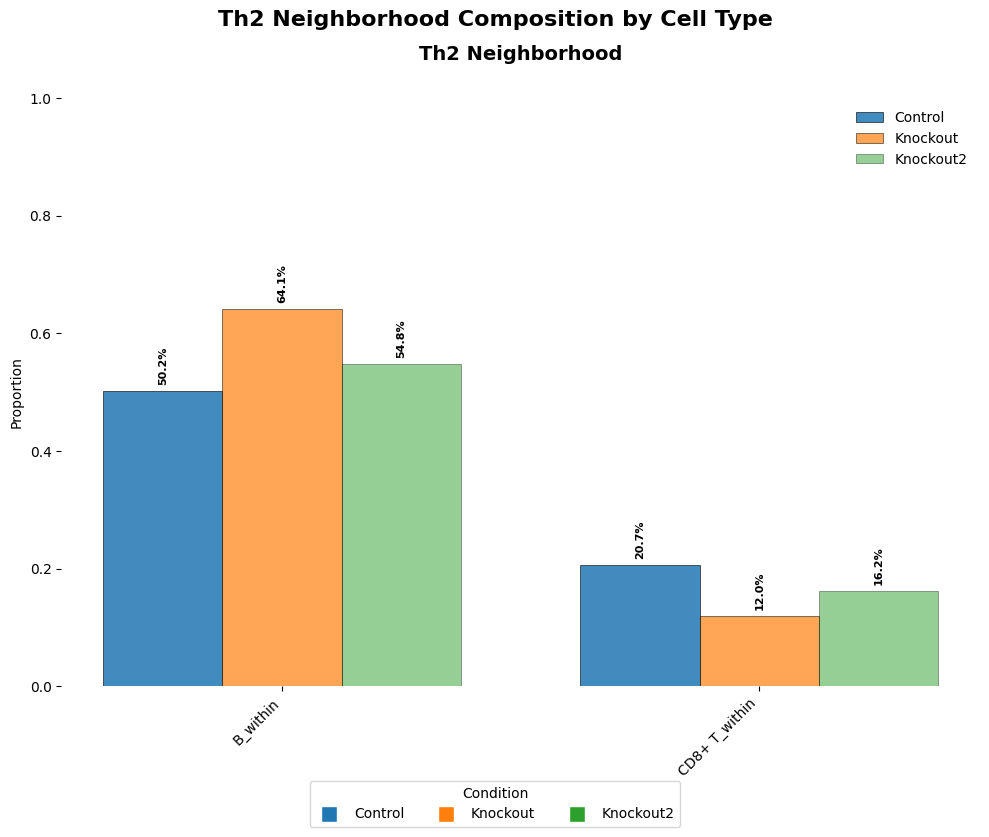

In [49]:
# only do Th2 cells

th2_control = adata_control[adata_control.obs.cell_type == 'Th2']
th2_ko = adata_ko[adata_ko.obs.cell_type == 'Th2']
th2_ko2 = adata_ko2[adata_ko2.obs.cell_type == 'Th2']

# get the neighborhood composition for each cell type

spf_ko = spf_ko.loc[th2_ko.obs_names]
spf_control = spf_control.loc[th2_control.obs_names]
spf_ko2 = spf_ko2.loc[th2_ko2.obs_names]

nbrs_control = {}
for cell_type in adata_control.obs.cell_type.unique():
    nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]

control_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    control_means[cell_type] = nbrs_control[cell_type].astype(float).mean() 
control_means = {k: v / v.sum() for k, v in control_means.items()}

nbrs_ko = {}
for cell_type in adata_ko.obs.cell_type.unique():
    nbrs_ko[cell_type] = spf_ko[adata_ko.obs.cell_type == cell_type]

ko_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    ko_means[cell_type] = nbrs_ko[cell_type].astype(float).mean() 
ko_means = {k: v / v.sum() for k, v in ko_means.items()}

nbrs_ko2 = {}
for cell_type in adata_ko2.obs.cell_type.unique():
    nbrs_ko2[cell_type] = spf_ko2[adata_ko2.obs.cell_type == cell_type]

ko2_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    ko2_means[cell_type] = nbrs_ko2[cell_type].astype(float).mean() 
ko2_means = {k: v / v.sum() for k, v in ko2_means.items()}

# Your existing data preparation code
plot_data = []

# Add control data
for cell_type, prop in control_means['Th2'].items():  
    plot_data.append({
        'cell_type': cell_type,
        'proportion': prop,
        'neighborhood': 'Th2',  # Fixed: was using undefined variable 'ct'
        'condition': 'Control'
    })

# Add knockout data
for cell_type, prop in ko_means['Th2'].items():
    plot_data.append({
        'cell_type': cell_type,
        'proportion': prop,
        'neighborhood': 'Th2',  # Fixed: was using undefined variable 'ct'
        'condition': 'Knockout'
    })

for cell_type, prop in ko2_means['Th2'].items():
    plot_data.append({
        'cell_type': cell_type,
        'proportion': prop,
        'neighborhood': 'Th2',  # Fixed: was using undefined variable 'ct'
        'condition': 'Knockout2'
    })

df = pd.DataFrame(plot_data)


df = df[df.cell_type.isin(['B_within', 'CD8+ T_within'])]

# Filter for only Th2 neighborhood
df = df[df['neighborhood'] == 'Th2']

# Create single subplot for Th2 neighborhood
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Get unique cell types and conditions
cell_types = df['cell_type'].unique()
conditions = ['Control', 'Knockout', 'Knockout2']

# Colors for conditions
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
color_map = dict(zip(conditions, colors))

# Since we only have Th2 neighborhood now, no need to loop
neighborhood_data = df  # df is already filtered for Th2
# Create x positions for cell types
x = np.arange(len(cell_types))
bar_width = 0.25  # Width of each bar

# Plot bars for each condition
for j, condition in enumerate(conditions):
    proportions = []
    for cell_type in cell_types:
        cond_cell_data = neighborhood_data[
            (neighborhood_data['condition'] == condition) & 
            (neighborhood_data['cell_type'] == cell_type)
        ]
        # Get proportion or 0 if no data
        prop = cond_cell_data['proportion'].iloc[0] if len(cond_cell_data) > 0 else 0
        proportions.append(prop)
    
    # Plot bars for this condition across all cell types
    bars = ax.bar(
        x + j * bar_width,  # Offset bars for different conditions
        proportions,
        width=bar_width,
        color=color_map[condition],
        label=condition,
        alpha=0.85 if condition == 'Control' else (0.7 if condition == 'Knockout' else 0.5),
        edgecolor='black',
        linewidth=0.5
    )
    
    # Add value labels
    for k, rect in enumerate(bars):
        value = proportions[k]
        if value > 0.01:
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_height() + 0.01,
                    f'{value:.1%}', ha='center', va='bottom', fontsize=8, 
                    fontweight='bold', rotation=90)

ax.set_title('Th2 Neighborhood', fontsize=14, fontweight='bold', y=1.05)
ax.set_ylabel('Proportion')
ax.set_ylim(0, 1)
ax.set_xticks(x + bar_width)  # Center the ticks between the three bars for each cell type
ax.set_xticklabels(cell_types, rotation=45, ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add legend for conditions
ax.legend(conditions, loc='upper right', fontsize=10, frameon=False)

# No need to remove empty subplots since we only have one

# Add color legend for conditions at the bottom
legend_elements = [plt.Line2D([0], [0], marker='s', color='w', label=condition,
                              markerfacecolor=color_map[condition], markersize=12)
                   for condition in conditions]
fig.legend(legend_elements, conditions, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(conditions), fontsize=10, title="Condition")

plt.suptitle('Th2 Neighborhood Composition by Cell Type', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.savefig(f'neighborhood_composition_radius{radius}_B_CD8_only_Th2.svg', 
            dpi=300, transparent=True, bbox_inches='tight', format='svg')
# plt.show()

In [56]:
# only do Prdm1+ Th2 cells

prdm1_control = adata_control[:, 'Prdm1'].to_df(layer='raw_count') > 0
th2_prdm1_control = adata_control[(adata_control.obs.cell_type == 'Th2') & (prdm1_control.values.flatten())]

prdm1_ko = adata_ko[:, 'Prdm1'].to_df(layer='raw_count') > 0
th2_prdm1_ko = adata_ko[(adata_ko.obs.cell_type == 'Th2') & (prdm1_ko.values.flatten())]

prdm1_ko2 = adata_ko2[:, 'Prdm1'].to_df(layer='raw_count') > 0
th2_prdm1_ko2 = adata_ko2[(adata_ko2.obs.cell_type == 'Th2') & (prdm1_ko2.values.flatten())]


In [64]:
spf_ko = spf_ko.loc[th2_prdm1_ko.obs_names]
spf_control = spf_control.loc[th2_prdm1_control.obs_names]
spf_ko2 = spf_ko2.loc[th2_prdm1_ko2.obs_names]

nbrs_control = {}
for cell_type in adata_control.obs.cell_type.unique():
    nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]

control_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    control_means[cell_type] = nbrs_control[cell_type].astype(float).mean() 
control_means = {k: v / v.sum() for k, v in control_means.items()}

nbrs_ko = {}
for cell_type in adata_ko.obs.cell_type.unique():
    nbrs_ko[cell_type] = spf_ko[adata_ko.obs.cell_type == cell_type]

ko_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    ko_means[cell_type] = nbrs_ko[cell_type].astype(float).mean() 
ko_means = {k: v / v.sum() for k, v in ko_means.items()}

nbrs_ko2 = {}
for cell_type in adata_ko2.obs.cell_type.unique():
    nbrs_ko2[cell_type] = spf_ko2[adata_ko2.obs.cell_type == cell_type]

ko2_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    ko2_means[cell_type] = nbrs_ko2[cell_type].astype(float).mean() 
ko2_means = {k: v / v.sum() for k, v in ko2_means.items()}


/tmp/ipykernel_8606/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_8606/413961065.

In [68]:
# Your existing data preparation code
plot_data = []

# Add control data
for cell_type, prop in control_means['Th2'].items():  
    plot_data.append({
        'cell_type': cell_type,
        'proportion': prop,
        'neighborhood': 'Th2',  # Fixed: was using undefined variable 'ct'
        'condition': 'Control'
    })

# Add knockout data
for cell_type, prop in ko_means['Th2'].items():
    plot_data.append({
        'cell_type': cell_type,
        'proportion': prop,
        'neighborhood': 'Th2',  # Fixed: was using undefined variable 'ct'
        'condition': 'Knockout'
    })

for cell_type, prop in ko2_means['Th2'].items():
    plot_data.append({
        'cell_type': cell_type,
        'proportion': prop,
        'neighborhood': 'Th2',  # Fixed: was using undefined variable 'ct'
        'condition': 'Knockout2'
    })

df = pd.DataFrame(plot_data)


In [ ]:
df = df[df.cell_type.isin(['B_within', 'CD8+ T_within'])]

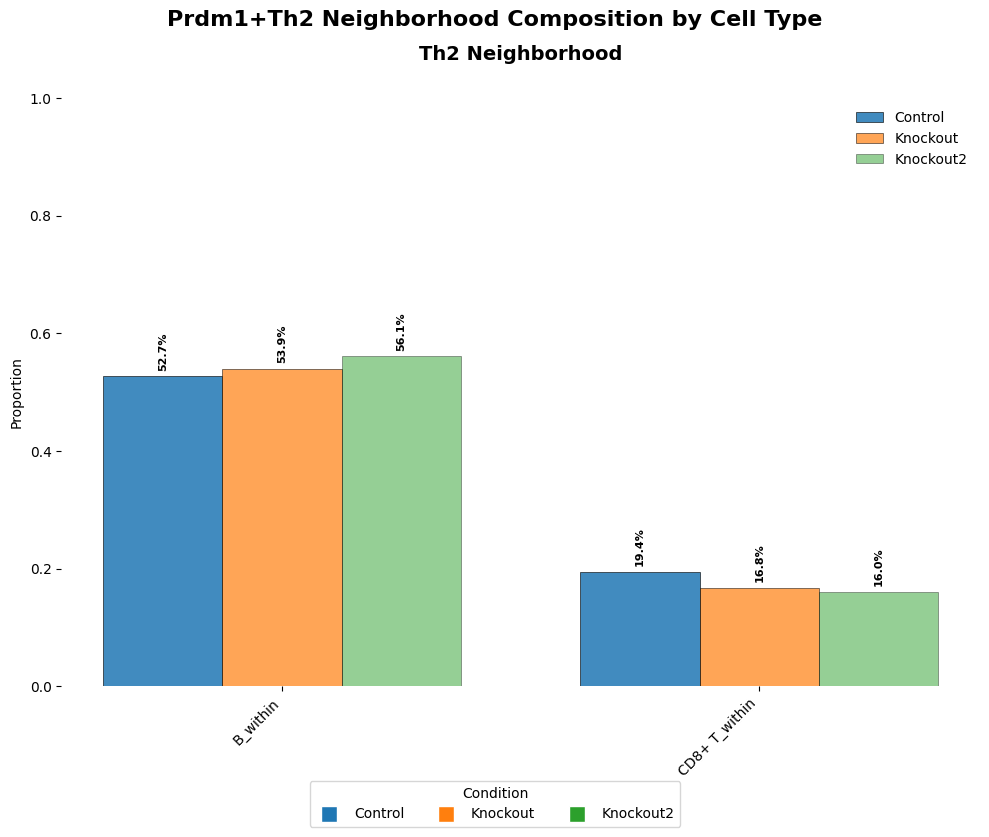

In [67]:
# Filter for only Th2 neighborhood
df = df[df['neighborhood'] == 'Th2']

# Create single subplot for Th2 neighborhood
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Get unique cell types and conditions
cell_types = df['cell_type'].unique()
conditions = ['Control', 'Knockout', 'Knockout2']

# Colors for conditions
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
color_map = dict(zip(conditions, colors))

# Since we only have Th2 neighborhood now, no need to loop
neighborhood_data = df  # df is already filtered for Th2
# Create x positions for cell types
x = np.arange(len(cell_types))
bar_width = 0.25  # Width of each bar

# Plot bars for each condition
for j, condition in enumerate(conditions):
    proportions = []
    for cell_type in cell_types:
        cond_cell_data = neighborhood_data[
            (neighborhood_data['condition'] == condition) & 
            (neighborhood_data['cell_type'] == cell_type)
        ]
        # Get proportion or 0 if no data
        prop = cond_cell_data['proportion'].iloc[0] if len(cond_cell_data) > 0 else 0
        proportions.append(prop)
    
    # Plot bars for this condition across all cell types
    bars = ax.bar(
        x + j * bar_width,  # Offset bars for different conditions
        proportions,
        width=bar_width,
        color=color_map[condition],
        label=condition,
        alpha=0.85 if condition == 'Control' else (0.7 if condition == 'Knockout' else 0.5),
        edgecolor='black',
        linewidth=0.5
    )
    
    # Add value labels
    for k, rect in enumerate(bars):
        value = proportions[k]
        if value > 0.01:
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_height() + 0.01,
                    f'{value:.1%}', ha='center', va='bottom', fontsize=8, 
                    fontweight='bold', rotation=90)

ax.set_title('Th2 Neighborhood', fontsize=14, fontweight='bold', y=1.05)
ax.set_ylabel('Proportion')
ax.set_ylim(0, 1)
ax.set_xticks(x + bar_width)  # Center the ticks between the three bars for each cell type
ax.set_xticklabels(cell_types, rotation=45, ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add legend for conditions
ax.legend(conditions, loc='upper right', fontsize=10, frameon=False)

# No need to remove empty subplots since we only have one

# Add color legend for conditions at the bottom
legend_elements = [plt.Line2D([0], [0], marker='s', color='w', label=condition,
                              markerfacecolor=color_map[condition], markersize=12)
                   for condition in conditions]
fig.legend(legend_elements, conditions, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(conditions), fontsize=10, title="Condition")

plt.suptitle('Prdm1+Th2 Neighborhood Composition by Cell Type', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.savefig(f'neighborhood_composition_radius{radius}_B_CD8_only_Prdm1Th2.svg', 
            dpi=300, transparent=True, bbox_inches='tight', format='svg')
# plt.show()

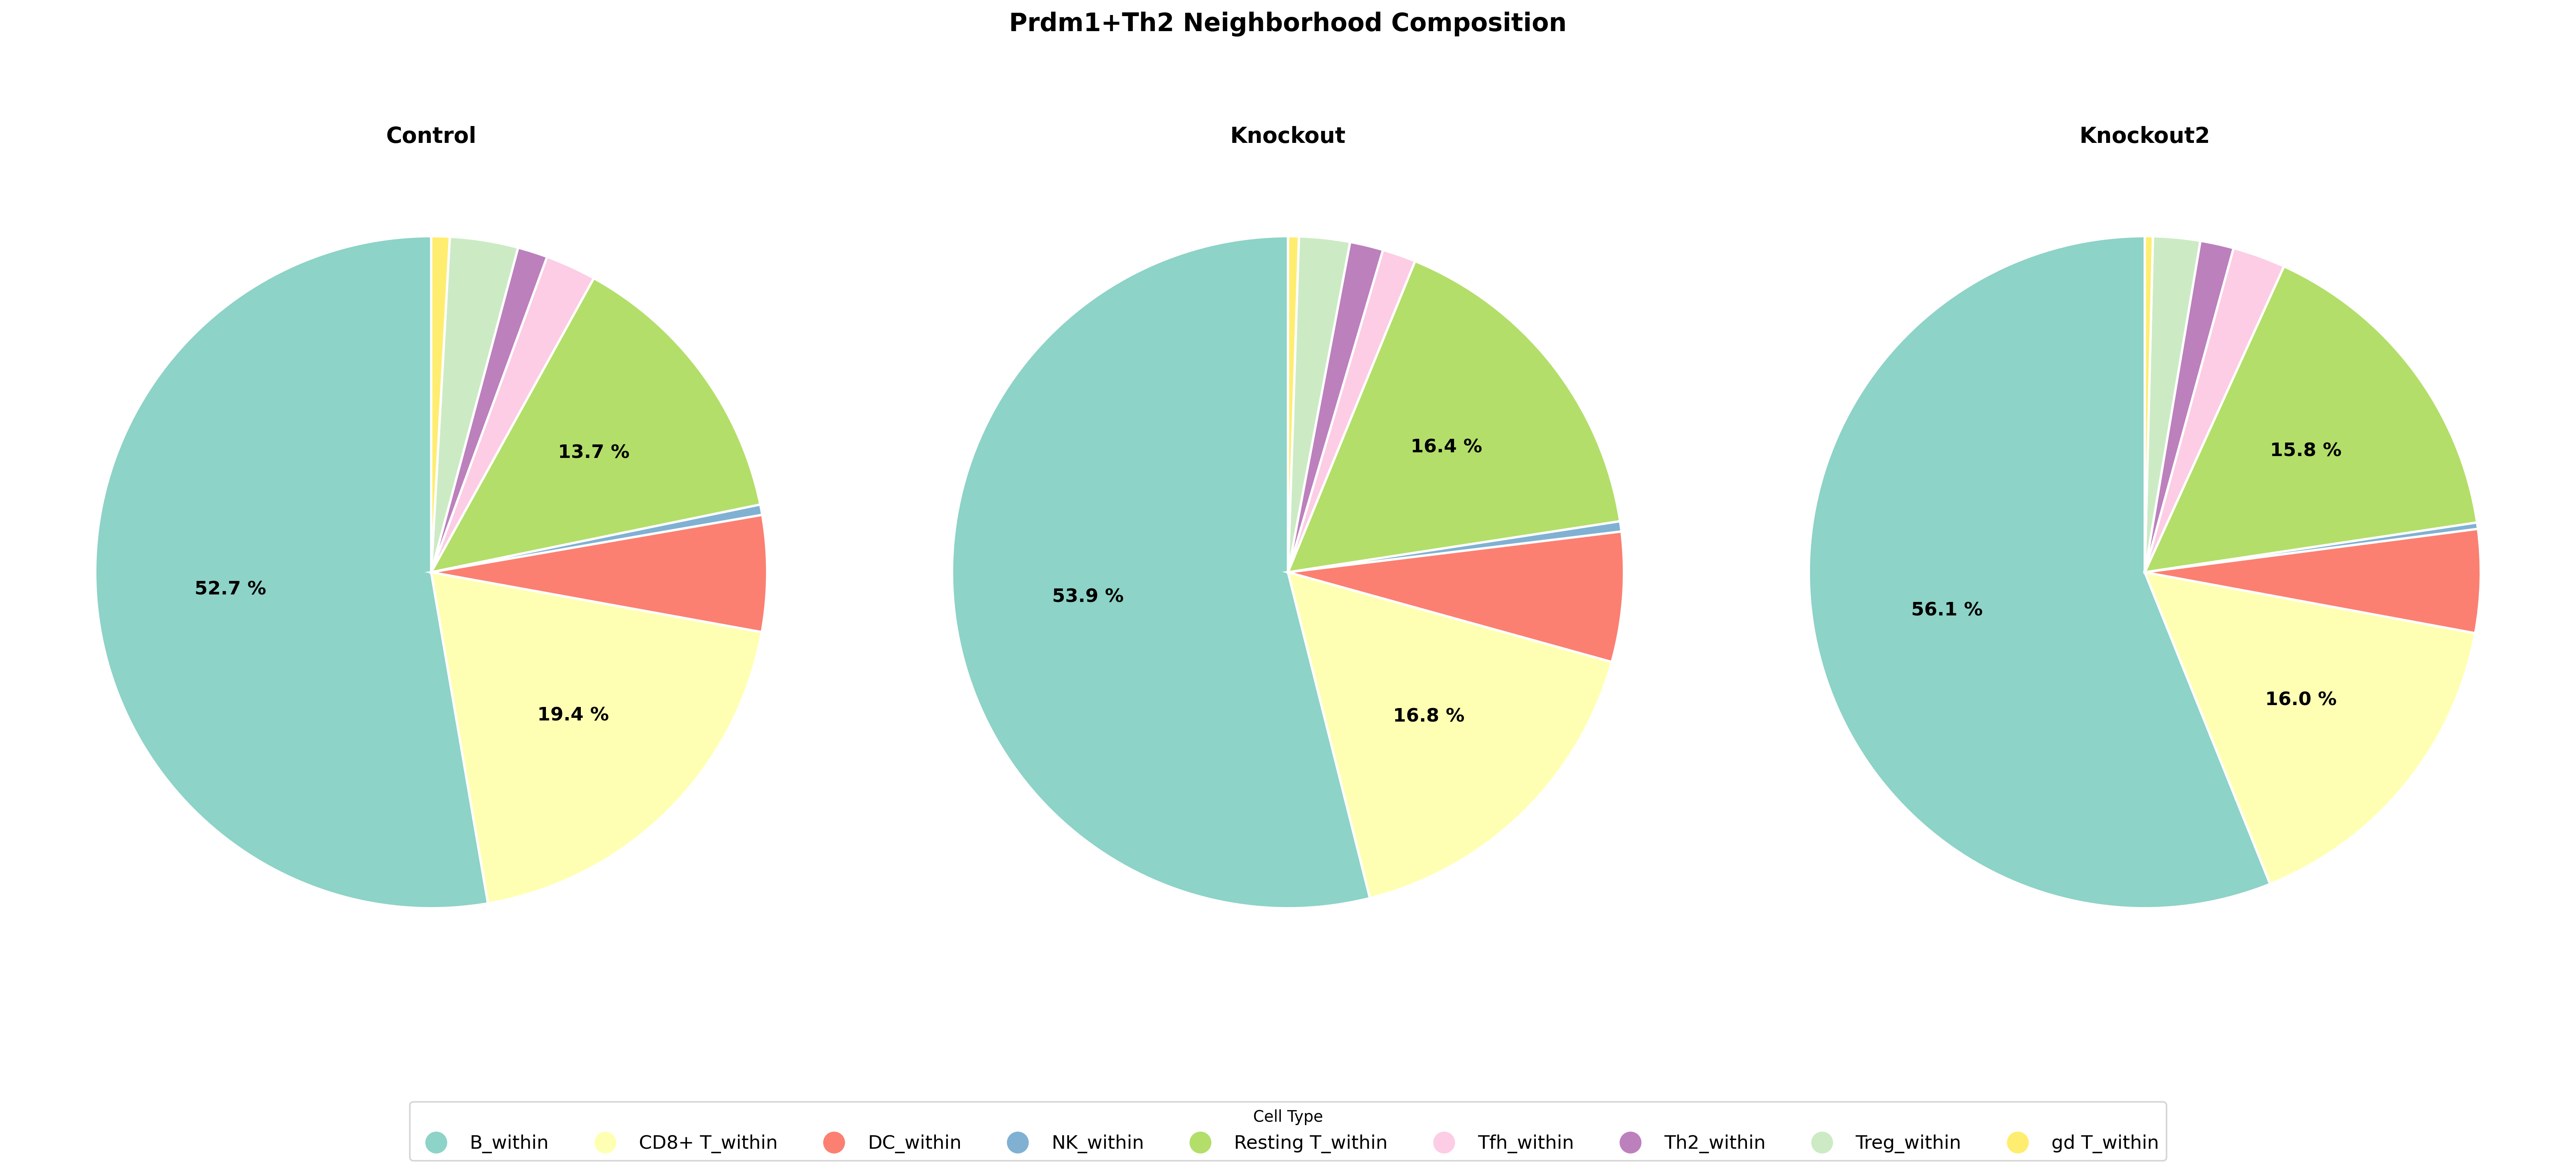

In [105]:
# Fix: ensure labels and colors match the data, and use correct variable names
df_th2 = df[df['neighborhood'] == 'Th2'].copy()

# Pie chart for each condition
conditions = ['Control', 'Knockout', 'Knockout2']
celltypes = list(cmap.keys())  # Ensure order is consistent and is a list

fig, axes = plt.subplots(1, len(conditions), figsize=(23, 10), dpi=300)
if len(conditions) == 1:
    axes = [axes]

for i, condition in enumerate(conditions):
    ax = axes[i]
    data = df_th2[df_th2['condition'] == condition]
    # Ensure order is consistent
    proportions = []
    for ct in celltypes:
        row = data[data['cell_type'] == ct]
        prop = row['proportion'].iloc[0] if len(row) > 0 else 0
        proportions.append(prop)

    wedges, texts, autotexts = ax.pie(
        proportions,
        # labels=celltypes,
        autopct=lambda p: f'{p:.1f} %' if p > 10 else '',
        # autopct='%1.1f%%',
        colors=[cmap[ct] for ct in celltypes],
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'},
        # pctdistance=1.1
    )
    ax.set_title(f'{condition}', fontsize=14, fontweight='bold')
    for w in wedges:
        w.set_edgecolor('white')
        w.set_linewidth(1.5)

# Add a legend for cell types
handles = [plt.Line2D([0], [0], marker='o', color='w', label=ct,
                      markerfacecolor=cmap[ct], markersize=15)
           for ct in celltypes]
fig.legend(handles, celltypes, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(celltypes), fontsize=12, title="Cell Type")

plt.suptitle('Prdm1+Th2 Neighborhood Composition', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.savefig(f'neighborhood_composition_radius{radius}_B_CD8_only_Prdm1Th2_pie.svg', 
            dpi=300, transparent=True, bbox_inches='tight', format='svg')
# plt.show()

In [ ]:
# Fix: ensure labels and colors match the data, and use correct variable names
df_th2 = df[df['neighborhood'] == 'Tfh'].copy()

# Pie chart for each condition
conditions = ['Control', 'Knockout', 'Knockout2']
celltypes = list(cmap.keys())  # Ensure order is consistent and is a list

fig, axes = plt.subplots(1, len(conditions), figsize=(23, 10), dpi=300)
if len(conditions) == 1:
    axes = [axes]

for i, condition in enumerate(conditions):
    ax = axes[i]
    data = df_th2[df_th2['condition'] == condition]
    # Ensure order is consistent
    proportions = []
    for ct in celltypes:
        row = data[data['cell_type'] == ct]
        prop = row['proportion'].iloc[0] if len(row) > 0 else 0
        proportions.append(prop)

    wedges, texts, autotexts = ax.pie(
        proportions,
        # labels=celltypes,
        autopct=lambda p: f'{p:.1f} %' if p > 10 else '',
        # autopct='%1.1f%%',
        colors=[cmap[ct] for ct in celltypes],
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'},
        # pctdistance=1.1
    )
    ax.set_title(f'{condition}', fontsize=14, fontweight='bold')
    for w in wedges:
        w.set_edgecolor('white')
        w.set_linewidth(1.5)

# Add a legend for cell types
handles = [plt.Line2D([0], [0], marker='o', color='w', label=ct,
                      markerfacecolor=cmap[ct], markersize=15)
           for ct in celltypes]
fig.legend(handles, celltypes, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(celltypes), fontsize=12, title="Cell Type")

plt.suptitle('Prdm1+Tfh Neighborhood Composition', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.savefig(f'neighborhood_composition_radius{radius}_B_CD8_only_Prdm1Tfh_pie.svg', 
            dpi=300, transparent=True, bbox_inches='tight', format='svg')
# plt.show()

### Count n cells in radius

In [15]:
# find Prdm1+ Th2 cells

prdm1_control = adata_control[:, 'Prdm1'].to_df(layer='raw_count') > 0
th2_prdm1_control = adata_control[(adata_control.obs.cell_type == 'Th2') & (prdm1_control.values.flatten())]

prdm1_ko = adata_ko[:, 'Prdm1'].to_df(layer='raw_count') > 0
th2_prdm1_ko = adata_ko[(adata_ko.obs.cell_type == 'Th2') & (prdm1_ko.values.flatten())]

prdm1_ko2 = adata_ko2[:, 'Prdm1'].to_df(layer='raw_count') > 0
th2_prdm1_ko2 = adata_ko2[(adata_ko2.obs.cell_type == 'Th2') & (prdm1_ko2.values.flatten())]

len(th2_prdm1_control), len(th2_prdm1_ko), len(th2_prdm1_ko2)


(30, 18, 41)

In [5]:
import scanpy as sc 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

spf_dict = defaultdict(dict)

for radius in [50, 100, 150, 200, 500, 800]:
    spf_control = pd.read_csv(f'spf_control_{radius}.csv', index_col=0)
    spf_ko = pd.read_csv(f'spf_ko_{radius}.csv', index_col=0)
    spf_ko2 = pd.read_csv(f'spf_ko2_{radius}.csv', index_col=0)

    spf_dict[radius]['control'] = spf_control
    spf_dict[radius]['ko'] = spf_ko
    spf_dict[radius]['ko2'] = spf_ko2

In [ ]:
s

In [24]:
spf_dict[radius]['control'].index

Index([247819, 200373, 190000, 176888, 253162, 271801, 207673, 292463, 295044,
       247190,
       ...
       176890, 178338, 304058, 263631, 245782, 257290, 248680, 301169, 181465,
       290912],
      dtype='int64', name='object_id', length=89296)

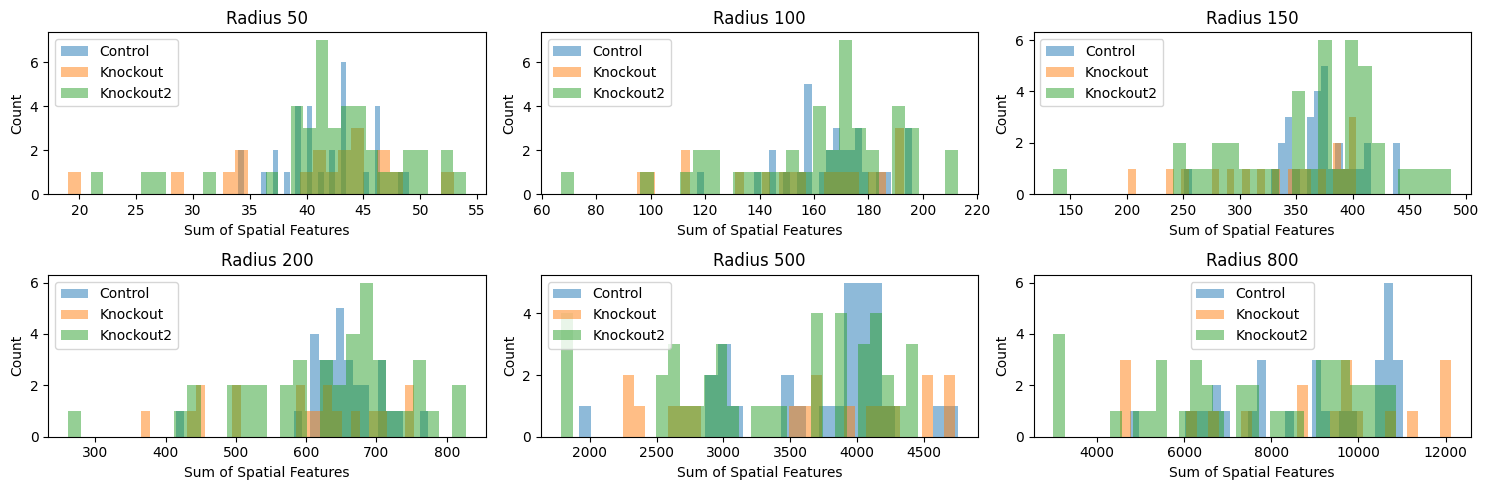

: 

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
axs = axs.flatten()

for i, radius in enumerate([50, 100, 150, 200, 500, 800]):
    axs[i].hist(spf_dict[radius]['control'].loc[th2_prdm1_control.obs.index.astype(int)].sum(axis=1), label='Control', alpha=0.5, bins=30)
    axs[i].hist(spf_dict[radius]['ko'].loc[th2_prdm1_ko.obs_names.astype(int)].sum(axis=1), label='Knockout', alpha=0.5, bins=30)
    axs[i].hist(spf_dict[radius]['ko2'].loc[th2_prdm1_ko2.obs_names.astype(int)].sum(axis=1), label='Knockout2', alpha=0.5, bins=30)

    axs[i].set_xlabel('Sum of Spatial Features')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Radius {radius}')
    axs[i].legend()

plt.tight_layout()
plt.show()

### Stacked bar plot 

In [24]:
%matplotlib inline

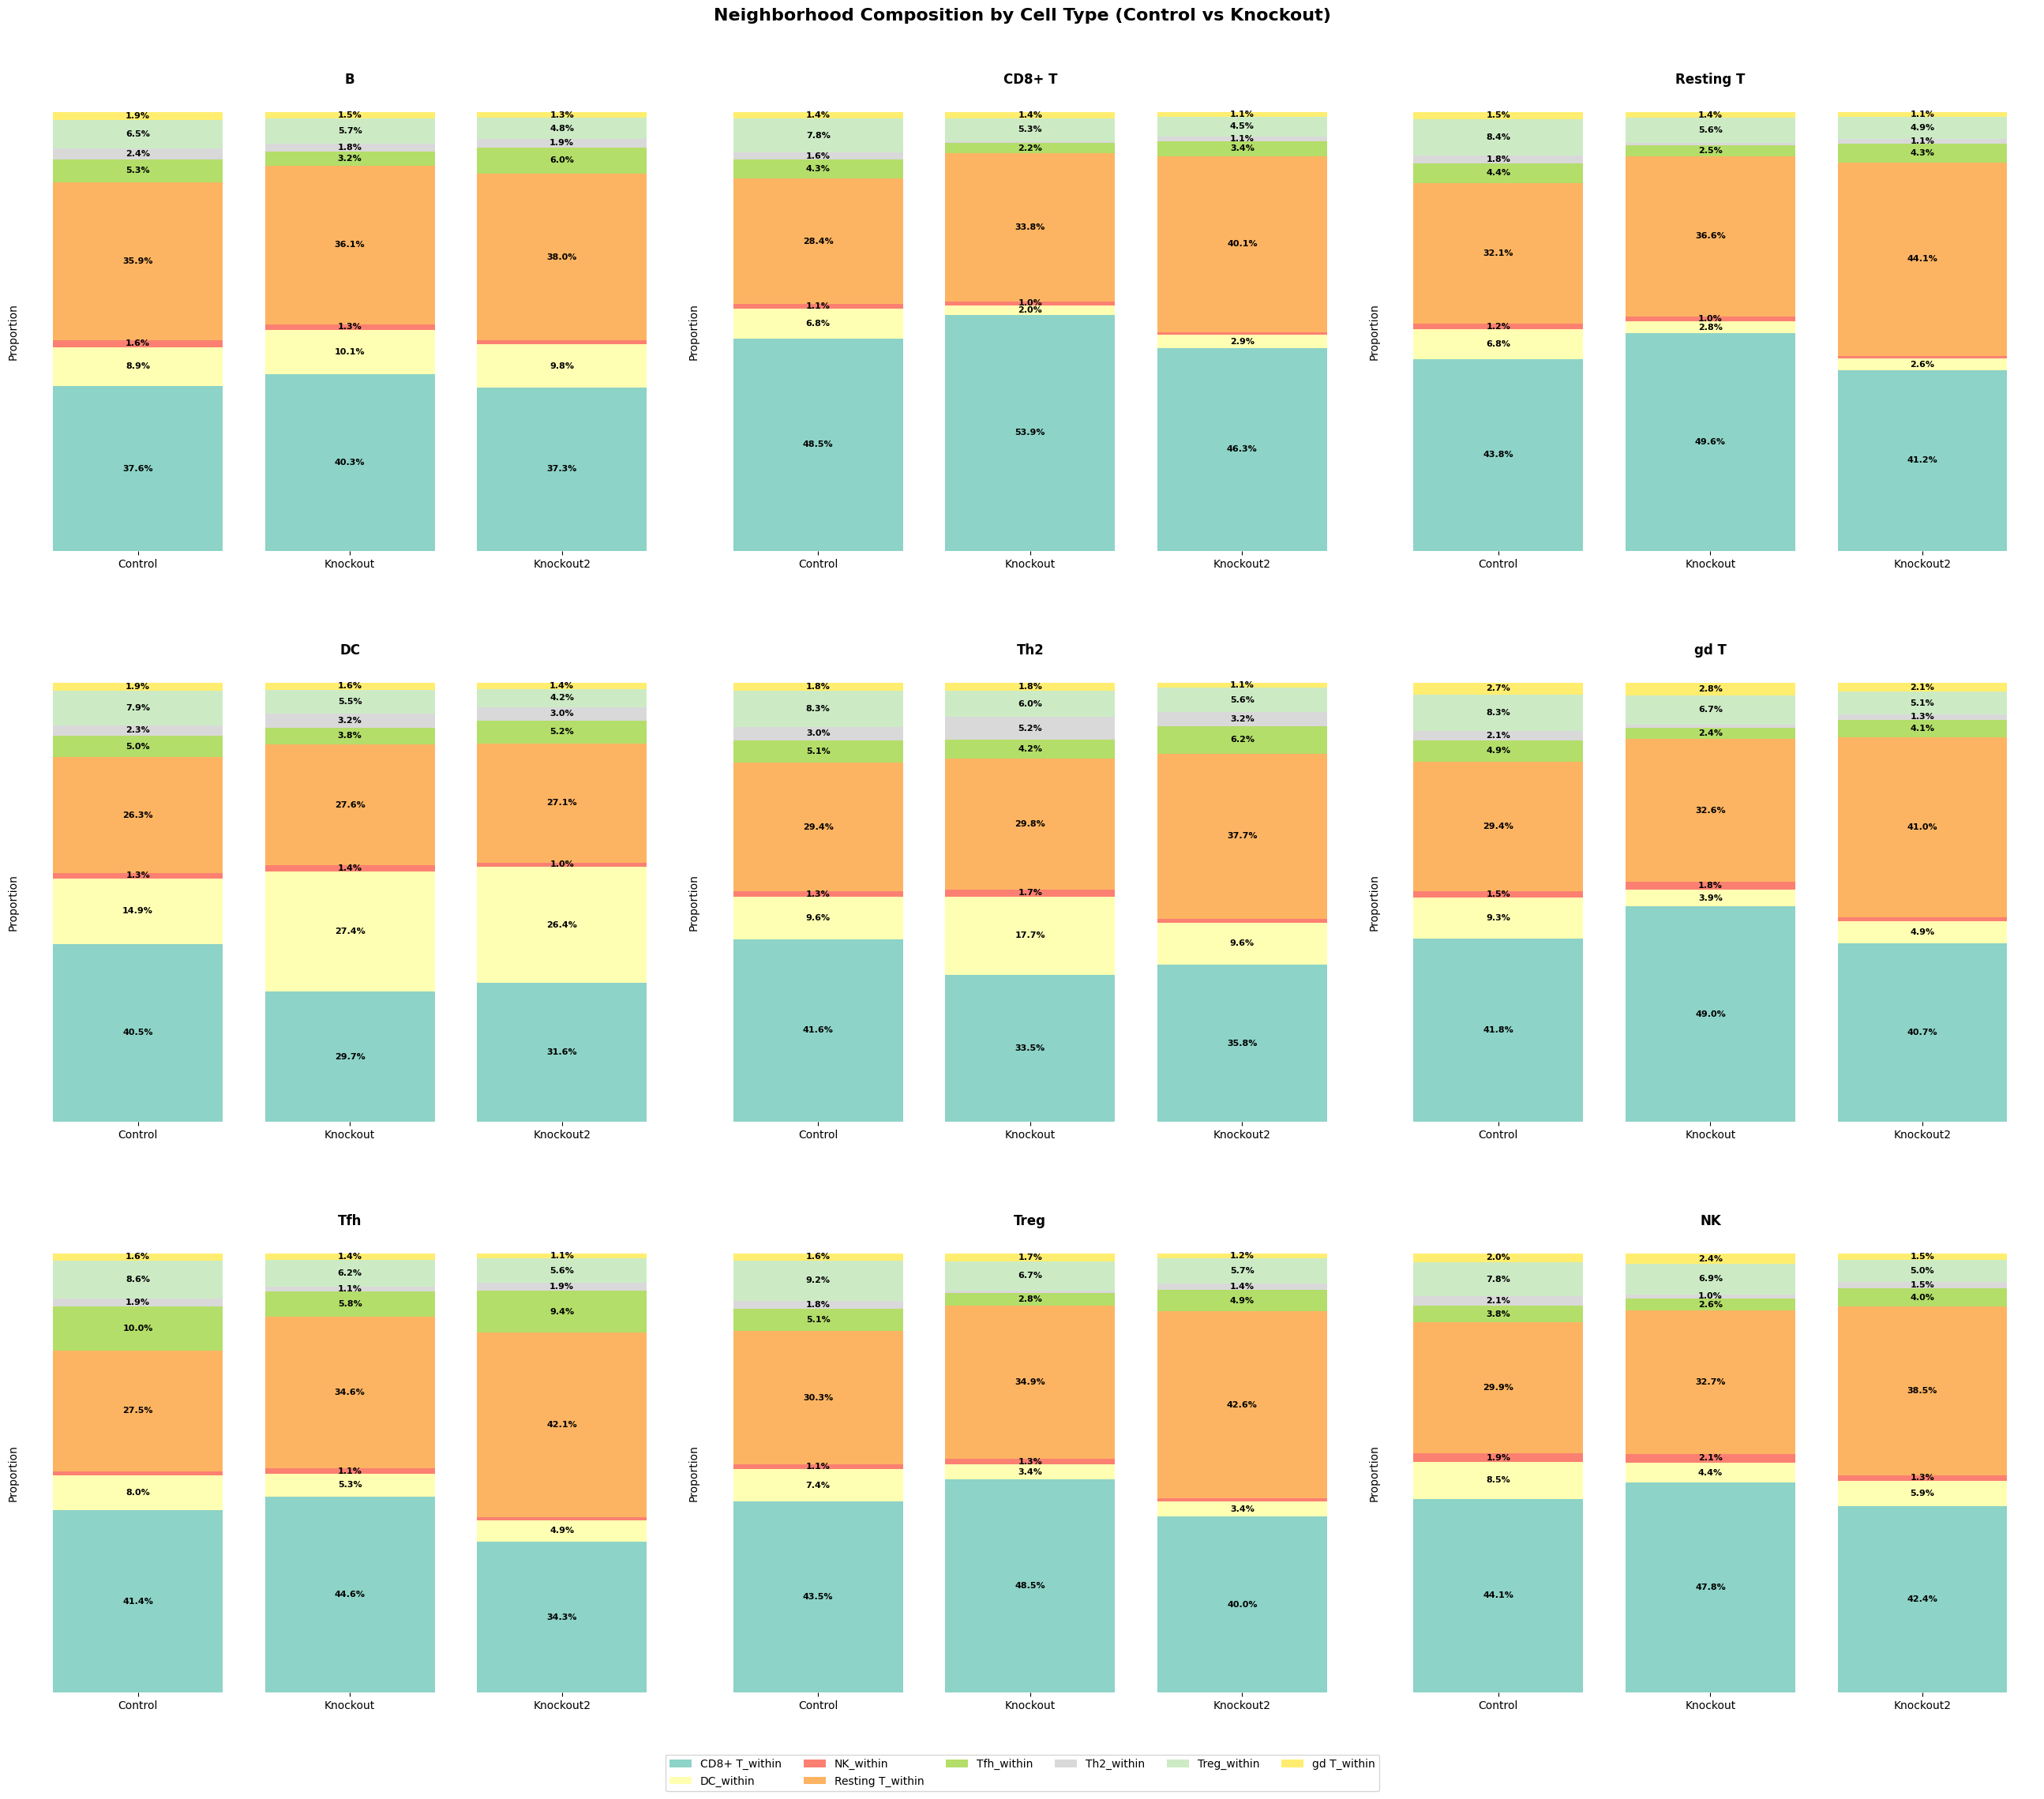

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plot_data = []
for ct in control_means.keys():
    # Add control data
    for cell_type, prop in control_means[ct].items():  

        plot_data.append({
            'cell_type': cell_type,
            'proportion': prop,
            'neighborhood': ct,
            'condition': 'Control'
        })
    # Add knockout data
    for cell_type, prop in ko_means[ct].items():

        plot_data.append({
            'cell_type': cell_type,
            'proportion': prop,
            'neighborhood': ct,
            'condition': 'Knockout'
        })

    for cell_type, prop in ko2_means[ct].items():

        plot_data.append({
            'cell_type': cell_type,
            'proportion': prop,
            'neighborhood': ct,
            'condition': 'Knockout2'
        })

    # # Add slideseq data
    # for cell_type, prop in ss_means[ct].items():
    #     plot_data.append({
    #         'cell_type': cell_type,
    #         'proportion': prop,
    #         'neighborhood': ct,
    #         'condition': 'Slideseq'
    #     })

df = pd.DataFrame(plot_data)

# Get unique neighborhoods and create subplots
neighborhoods = df['neighborhood'].unique()
n_neighborhoods = len(neighborhoods)
n_cols = 3
n_rows = (n_neighborhoods + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, 22))
axes = axes.flatten() if n_neighborhoods > 1 else [axes]

# Get unique cell types for consistent coloring
cell_types = df['cell_type'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(cell_types)))
color_map = dict(zip(cell_types, colors))

for i, neighborhood in enumerate(neighborhoods):
    ax = axes[i]
    
    # Filter data for this neighborhood
    neighborhood_data = df[df['neighborhood'] == neighborhood]
    
    # Pivot data for stacked bar plot
    pivot_data = neighborhood_data.pivot_table(
        index='condition', 
        columns='cell_type', 
        values='proportion', 
        fill_value=0
    )
    
    # Create stacked bar plot
    bottom = np.zeros(len(pivot_data))
    
    for cell_type in pivot_data.columns:
        values = pivot_data[cell_type].values
        bars = ax.bar(pivot_data.index, values, bottom=bottom, 
                     color=color_map[cell_type], label=cell_type)
        
        # Add percentage labels
        for j, (bar, value) in enumerate(zip(bars, values)):
            if value > 0.01:  # Only show labels for segments > 1%
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., 
                       bottom[j] + height/2.,
                       f'{value:.1%}',
                       ha='center', va='center', fontsize=8, fontweight='bold')
        
        bottom += values
    
    ax.set_title(f'{neighborhood}', fontsize=12, fontweight='bold', y=1.05)
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 1)
    # ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Remove empty subplots
for i in range(n_neighborhoods, len(axes)):
    fig.delaxes(axes[i])

# Add legend at bottom
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), 
          ncol=min(len(labels), 6), fontsize=10)

plt.suptitle('Neighborhood Composition by Cell Type (Control vs Knockout)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.01, hspace=0.3)  # Add vertical space between rows

plt.savefig('neighborhood_composition_noB.svg', dpi=300, transparent=True, bbox_inches='tight', format='svg')
# plt.show()

In [26]:
# only do Prdm1+ Th2 cells

prdm1_control = adata_control[:, 'Prdm1'].to_df(layer='raw_count') > 0
th2_prdm1_control = adata_control[(adata_control.obs.cell_type == 'Th2') & (prdm1_control.values.flatten())]

prdm1_ko = adata_ko[:, 'Prdm1'].to_df(layer='raw_count') > 0
th2_prdm1_ko = adata_ko[(adata_ko.obs.cell_type == 'Th2') & (prdm1_ko.values.flatten())]

prdm1_ko2 = adata_ko2[:, 'Prdm1'].to_df(layer='raw_count') > 0
th2_prdm1_ko2 = adata_ko2[(adata_ko2.obs.cell_type == 'Th2') & (prdm1_ko2.values.flatten())]


In [96]:
spf_ko = spf_ko.loc[th2_prdm1_ko.obs_names]
spf_control = spf_control.loc[th2_prdm1_control.obs_names]
spf_ko2 = spf_ko2.loc[th2_prdm1_ko2.obs_names]

nbrs_control = {}
for cell_type in adata_control.obs.cell_type.unique():
    nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]

control_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    control_means[cell_type] = nbrs_control[cell_type].astype(float).mean() 
control_means = {k: v / v.sum() for k, v in control_means.items()}

nbrs_ko = {}
for cell_type in adata_ko.obs.cell_type.unique():
    nbrs_ko[cell_type] = spf_ko[adata_ko.obs.cell_type == cell_type]

ko_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    ko_means[cell_type] = nbrs_ko[cell_type].astype(float).mean() 
ko_means = {k: v / v.sum() for k, v in ko_means.items()}

nbrs_ko2 = {}
for cell_type in adata_ko2.obs.cell_type.unique():
    nbrs_ko2[cell_type] = spf_ko2[adata_ko2.obs.cell_type == cell_type]

ko2_means = {}
for cell_type in nbrs_control.keys():
    # Convert to numeric values before calculating mean
    ko2_means[cell_type] = nbrs_ko2[cell_type].astype(float).mean() 
ko2_means = {k: v / v.sum() for k, v in ko2_means.items()}


/tmp/ipykernel_62461/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_62461/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_62461/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_62461/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_62461/413961065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbrs_control[cell_type] = spf_control[adata_control.obs.cell_type == cell_type]
/tmp/ipykernel_62461/4139

In [ ]:
nbrs_ko2['Th2'].drop('B_within', axis=1, inplace=True)
ko2_means['Th2'] = nbrs_ko2['Th2'].astype(float).mean() 
ko2_means['Th2'] = ko2_means['Th2'] / ko2_means['Th2'].sum()

nbrs_control['Th2'].drop('B_within', axis=1, inplace=True)
control_means['Th2'] = nbrs_control['Th2'].astype(float).mean() 
control_means['Th2'] = control_means['Th2'] / control_means['Th2'].sum()

nbrs_ko['Th2'].drop('B_within', axis=1, inplace=True)
ko_means['Th2'] = nbrs_ko['Th2'].astype(float).mean() 
ko_means['Th2'] = ko_means['Th2'] / ko_means['Th2'].sum()

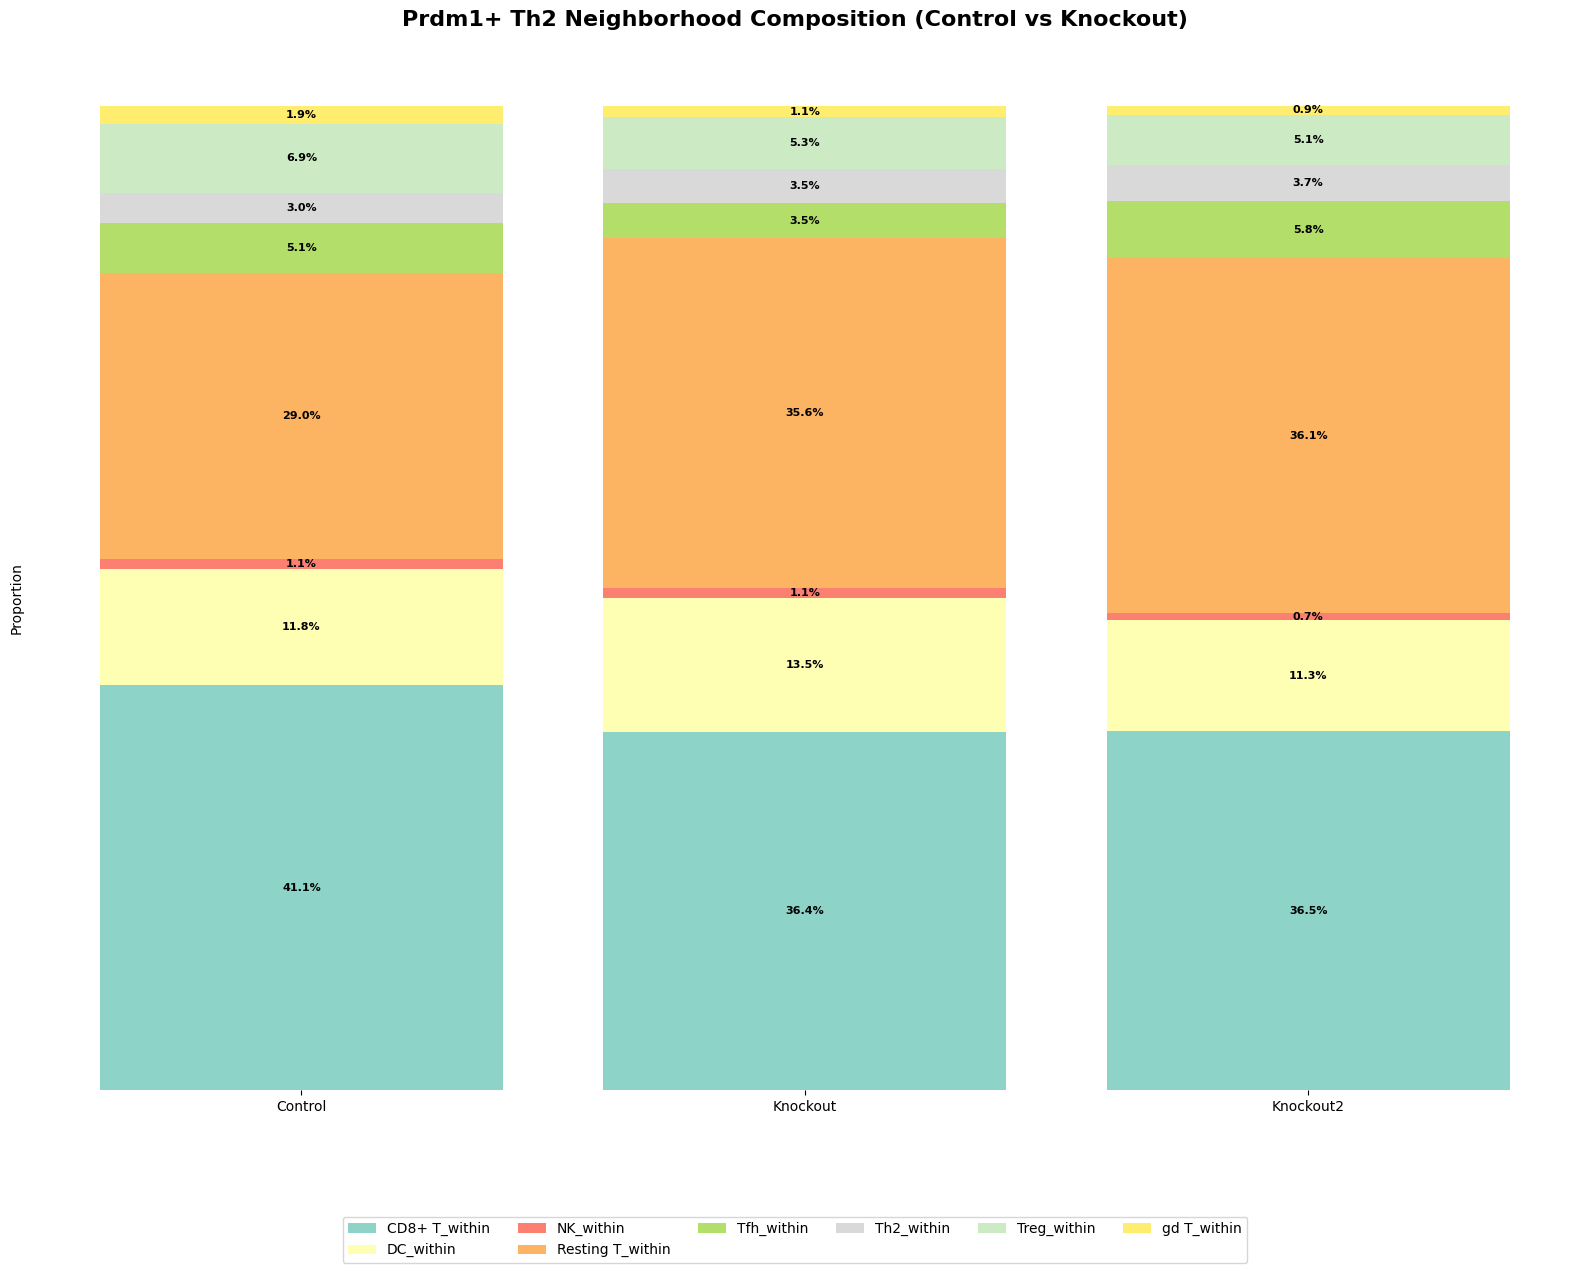

In [108]:
# Your existing data preparation code
plot_data = []

# Add control data
for cell_type, prop in control_means['Th2'].items():  
    plot_data.append({
        'cell_type': cell_type,
        'proportion': prop,
        'neighborhood': ct,
        'condition': 'Control'
    })

# Add knockout data
for cell_type, prop in ko_means['Th2'].items():
    plot_data.append({
        'cell_type': cell_type,
        'proportion': prop,
        'neighborhood': ct,
        'condition': 'Knockout'
    })

for cell_type, prop in ko2_means['Th2'].items():
    plot_data.append({
        'cell_type': cell_type,
        'proportion': prop,
        'neighborhood': ct,
        'condition': 'Knockout2'
    })

df = pd.DataFrame(plot_data)

fig, ax = plt.subplots(figsize=(16, 12))

cell_types = df['cell_type'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(cell_types)))
color_map = dict(zip(cell_types, colors))

# Filter data for this neighborhood
neighborhood_data = df[df['neighborhood'] == neighborhood]

# Pivot data for stacked bar plot
pivot_data = neighborhood_data.pivot_table(
    index='condition', 
    columns='cell_type', 
    values='proportion', 
    fill_value=0
)

# NEW APPROACH: Create all bars first, then add labels
conditions = pivot_data.index
n_conditions = len(conditions)
bar_width = 0.8
x_positions = np.arange(n_conditions)

# Store all bar information for later text placement
all_bars = []
cumulative_heights = np.zeros(n_conditions)

# Create stacked bars and store information
for i, cell_type in enumerate(pivot_data.columns):
    values = pivot_data[cell_type].values
    
    # Create bars
    bars = ax.bar(x_positions, values, bottom=cumulative_heights, 
                  color=color_map[cell_type], label=cell_type, width=bar_width)
    
    # Store bar info for text placement
    for j, (bar, value) in enumerate(zip(bars, values)):
        if value > 0.002:  # Only store info for segments > 2%
            all_bars.append({
                'bar': bar,
                'value': value,
                'bottom': cumulative_heights[j],
                'condition_index': j
            })
    
    # Update cumulative heights for next layer
    cumulative_heights += values

# Now add all text labels using stored information
for bar_info in all_bars:
    bar = bar_info['bar']
    value = bar_info['value']
    bottom = bar_info['bottom']
    
    # Calculate text position
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bottom + value / 2
    
    # Add text
    ax.text(text_x, text_y, f'{value:.1%}',
            ha='center', va='center', fontsize=8, fontweight='bold',
            color='black')

# Set up the plot
ax.set_ylabel('Proportion')
ax.set_ylim(0, 1)
ax.set_xticks(x_positions)
ax.set_xticklabels(conditions)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add legend at bottom
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), 
          ncol=min(len(labels), 6), fontsize=10)

plt.suptitle('Prdm1+ Th2 Neighborhood Composition (Control vs Knockout)', 
             fontsize=16, fontweight='bold', y=1)
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.1, hspace=0.3)

plt.savefig('neighborhood_composition_Prdm1+Th2_noB.svg', dpi=300, transparent=True, bbox_inches='tight', format='svg')

In [138]:
th2_prdm1_control 

View of AnnData object with n_obs × n_vars = 30 × 2116
    obs: 'sample', 'cell_type', 'secondary_annot', 'cell_type_int'
    uns: 'cell_thresholds', 'cell_type_colors', 'neighbors', 'received_ligands', 'received_ligands_tfl', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_features', 'spatial_maps', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'connectivities', 'distances'

In [ ]:
th2_prdm1_control 

/tmp/ipykernel_62461/3235587643.py:68: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_elements = [plt.scatter([], [], c=color_map[ct], s=50, label=ct)
/tmp/ipykernel_62461/3235587643.py:68: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_elements = [plt.scatter([], [], c=color_map[ct], s=50, label=ct)
/tmp/ipykernel_62461/3235587643.py:68: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence,

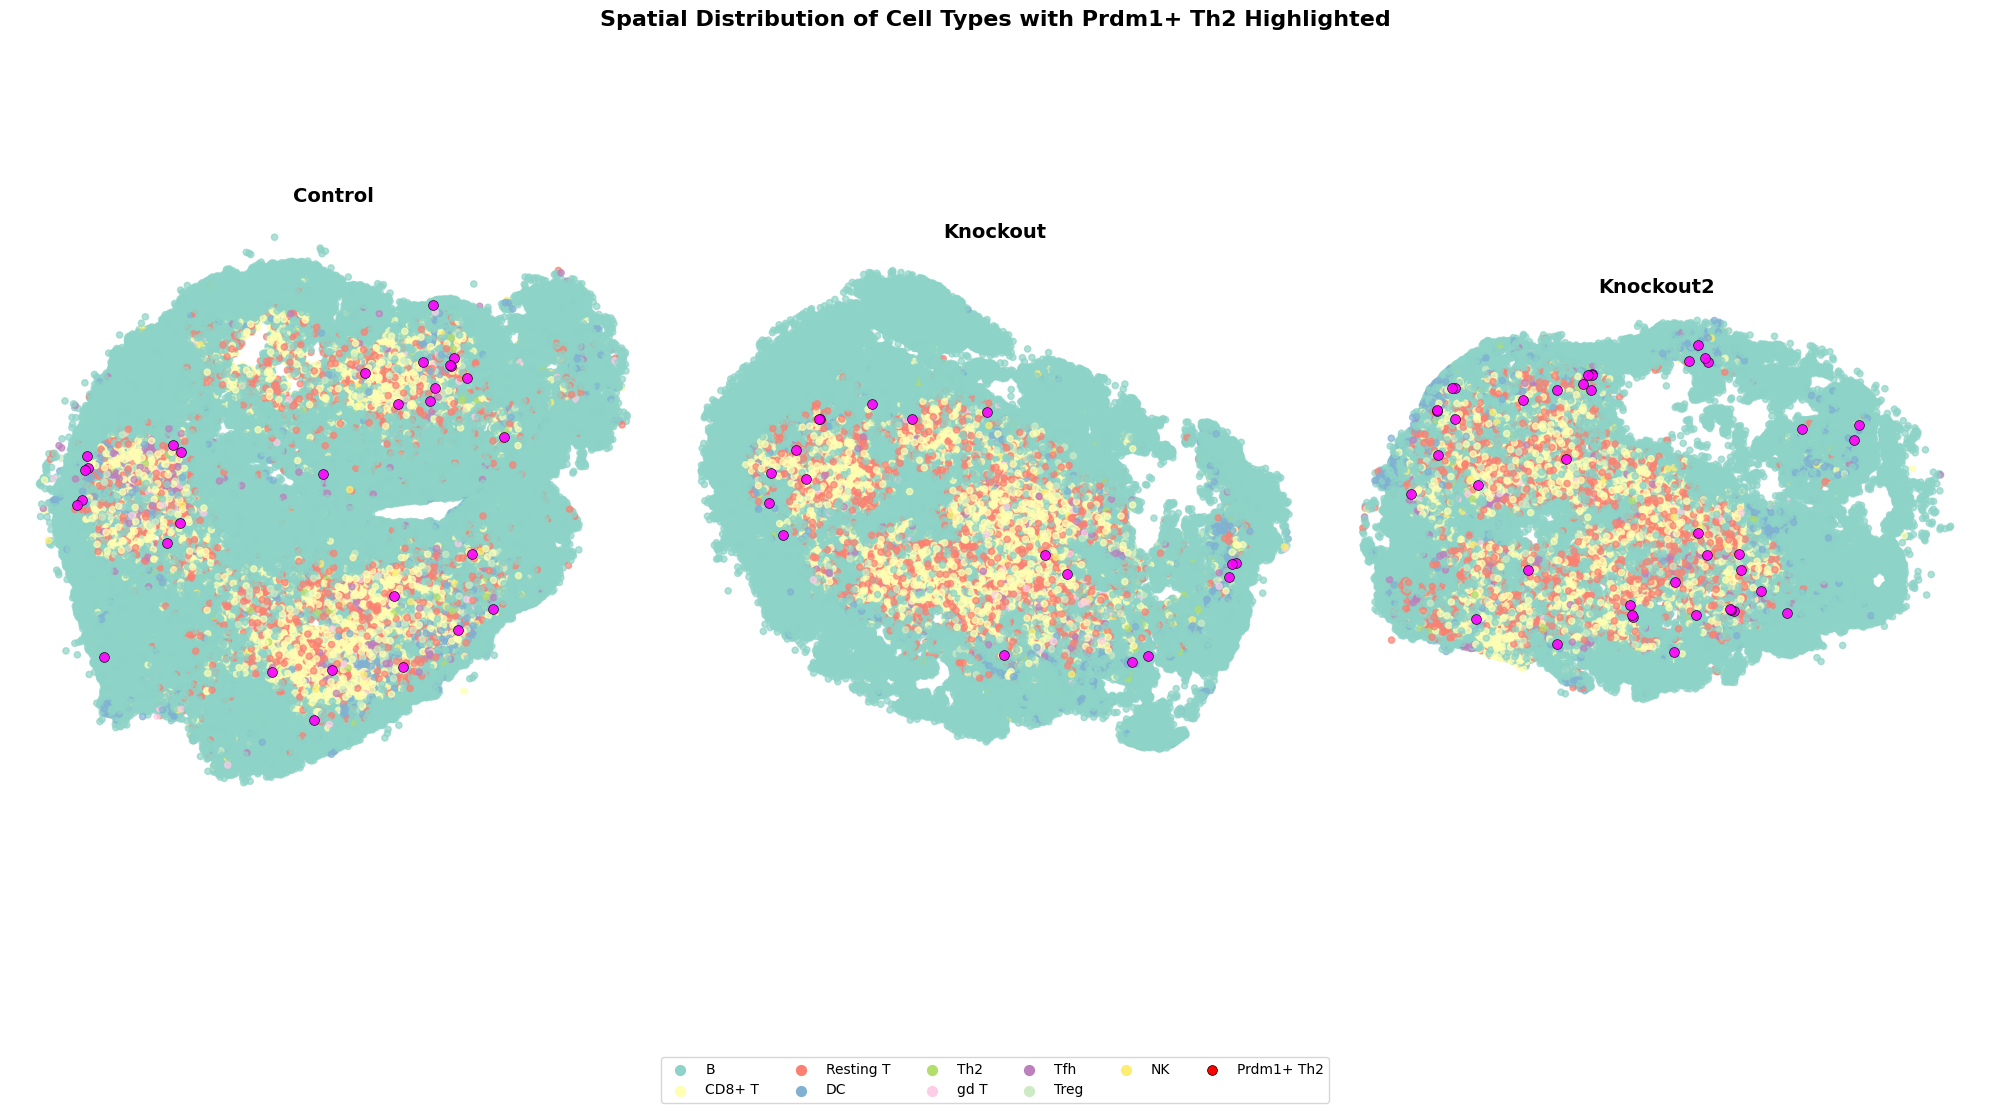

In [76]:
# Create a consistent color mapping for cell types using same colormap as before
unique_cell_types = pd.concat([adata_control.obs['cell_type'], 
                              adata_ko.obs['cell_type']]).unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_cell_types)))
color_map = dict(zip(unique_cell_types, colors))

# Map cell types to colors for both datasets
control_colors = [color_map[ct] for ct in adata_control.obs['cell_type']]
ko_colors = [color_map[ct] for ct in adata_ko.obs['cell_type']]
ko2_colors = [color_map[ct] for ct in adata_ko2.obs['cell_type']]

# Create figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# Plot control data
scatter1 = ax1.scatter(adata_control.obsm['spatial'][:, 0],
                       adata_control.obsm['spatial'][:, 1],
                       c=control_colors,
                       s=20, alpha=0.7)

ax1.scatter(th2_prdm1_control.obsm['spatial'][:, 0],
            th2_prdm1_control.obsm['spatial'][:, 1],
            c='magenta', s=50, alpha=0.9, edgecolors='black', linewidth=0.5
        )

ax1.set_title('Control', fontsize=14, fontweight='bold')
ax1.set_aspect('equal')
ax1.axis('off')

# Plot knockout data
scatter2 = ax2.scatter(adata_ko.obsm['spatial'][:, 0],
                       adata_ko.obsm['spatial'][:, 1],
                       c=ko_colors,
                       s=20, alpha=0.7)

# Add Prdm1+ Th2 for knockout if it exists
if 'th2_prdm1_ko' in locals() or 'th2_prdm1_ko' in globals():
    ax2.scatter(th2_prdm1_ko.obsm['spatial'][:, 0],
                th2_prdm1_ko.obsm['spatial'][:, 1],
                c='magenta', s=50, alpha=0.9, edgecolors='black', linewidth=0.5
            )

ax2.set_title('Knockout', fontsize=14, fontweight='bold')
ax2.set_aspect('equal')
ax2.axis('off')

# Plot knockout2 data
scatter3 = ax3.scatter(adata_ko2.obsm['spatial'][:, 0],
                       adata_ko2.obsm['spatial'][:, 1],
                       c=ko2_colors,
                       s=20, alpha=0.7)

if 'th2_prdm1_ko2' in locals() or 'th2_prdm1_ko2' in globals():
    ax3.scatter(th2_prdm1_ko2.obsm['spatial'][:, 0],
                th2_prdm1_ko2.obsm['spatial'][:, 1],
                c='magenta', s=50, alpha=0.9, edgecolors='black', linewidth=0.5
            )

ax3.set_title('Knockout2', fontsize=14, fontweight='bold')
ax3.set_aspect('equal')
ax3.axis('off')

# Create legend
legend_elements = [plt.scatter([], [], c=color_map[ct], s=50, label=ct) 
                  for ct in unique_cell_types]
legend_elements.append(plt.scatter([], [], c='red', s=50, 
                                 edgecolors='black', linewidth=0.5, 
                                 label='Prdm1+ Th2'))

# Add legend below the plots
fig.legend(handles=legend_elements, loc='lower center', 
          bbox_to_anchor=(0.5, -0.05), ncol=min(len(legend_elements), 6), 
          fontsize=10)

plt.suptitle('Spatial Distribution of Cell Types with Prdm1+ Th2 Highlighted',
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for legend

plt.savefig('spatial_distribution_prdm1_th2.svg', dpi=300, transparent=True, 
           bbox_inches='tight', format='svg')
plt.show()

In [ ]:
# # Create subplots for each cell type
# n_cell_types = len(control_means.keys())
# n_cols = 3
# n_rows = (n_cell_types + n_cols - 1) // n_cols  # Ceiling division

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
# axes = axes.flatten()

# for idx, cell_type in enumerate(control_means.keys()):
#     # Get the features and their values
#     features = control_means[cell_type].index
#     control_values = control_means[cell_type].values
#     ko_values = ko_means[cell_type].values
    
#     # Create the stacked bar plot
#     axes[idx].bar(['Control', 'Knockout'], 
#             [control_values[0], ko_values[0]], 
#             label=features[0])
#     bottom_control = control_values[0]
#     bottom_ko = ko_values[0]
    
#     for i in range(1, len(features)):
#         axes[idx].bar(['Control', 'Knockout'],
#                 [control_values[i], ko_values[i]],
#                 bottom=[bottom_control, bottom_ko],
#                 label=features[i])
#         bottom_control += control_values[i]
#         bottom_ko += ko_values[i]
    
#     axes[idx].set_title(f'{cell_type} Cell Neighborhood Composition')
#     axes[idx].set_ylabel('Proportion')
    
#     # Only show legend for the first subplot
#     if idx == 0:
#         axes[idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# # Remove empty subplots
# for idx in range(len(control_means.keys()), len(axes)):
#     fig.delaxes(axes[idx])

# plt.tight_layout()
# plt.show()